Original Dataset Link: https://drive.google.com/file/d/1v_NvEqtA7ZQhfFqSwcn91Jg1-Z8-uTzJ/view?usp=sharing


Load and Prepare Data

In [1]:
import pandas as pd
data = pd.read_csv('mockdata.csv')
data.head()

Gender  Age Ethnicity         Marital Status                Interests  \
0  Female   77     White  Married or Cohabiting  attending social events   
1    Male   91     White  Married or Cohabiting  attending social events   
2  Female   71     White                Widowed             taking walks   
3    Male   81     White  Married or Cohabiting                  Reading   
4  Female   73     White  Married or Cohabiting                  Reading   

                                 Health Issues Residence Type  \
0  Periodontal Disease, Ischemic Heart Disease          Urban   
1                   Hypertension, Hypertension          Urban   
2       Ischemic Heart Disease, Osteoarthritis          Urban   
3                         Osteoporosis, Cancer          Urban   
4       Mood & Anxiety Disorders, Hypertension          Urban   

   Housing Condition Living Alone                           Sleep Quality  \
0  Private Residence           No                                    Good   
1  Private Residence           No                                    Good   
2  Private Residence           No  Occasionally Difficulty Falling Asleep   
3  Private Residence          Yes                      Daytime Sleepiness   
4  Private Residence           No  Occasionally Difficulty Falling Asleep   

        Sleep Hours     Social Condition Disability Status  
0  Meet Sleep Rules               Normal                No  
1  Meet Sleep Rules  Occasionally Lonely               Yes  
2  Meet Sleep Rules               Lonely                No  
3  Meet Sleep Rules               Normal               Yes  
4  Meet Sleep Rules               Normal                No

In [2]:
# spilt Health Issues column
split_issues = data["Health Issues"].str.split(",", n=1, expand=True)

# adding new columns
data["issue1"] = split_issues[0]
data["issue2"] = split_issues[1]

# delect
data.drop("Health Issues", axis=1, inplace=True)
# replace Nah
data.fillna(0, inplace=True)
data.head()

Gender  Age Ethnicity         Marital Status                Interests  \
0  Female   77     White  Married or Cohabiting  attending social events   
1    Male   91     White  Married or Cohabiting  attending social events   
2  Female   71     White                Widowed             taking walks   
3    Male   81     White  Married or Cohabiting                  Reading   
4  Female   73     White  Married or Cohabiting                  Reading   

  Residence Type  Housing Condition Living Alone  \
0          Urban  Private Residence           No   
1          Urban  Private Residence           No   
2          Urban  Private Residence           No   
3          Urban  Private Residence          Yes   
4          Urban  Private Residence           No   

                            Sleep Quality       Sleep Hours  \
0                                    Good  Meet Sleep Rules   
1                                    Good  Meet Sleep Rules   
2  Occasionally Difficulty Falling Asleep  Meet Sleep Rules   
3                      Daytime Sleepiness  Meet Sleep Rules   
4  Occasionally Difficulty Falling Asleep  Meet Sleep Rules   

      Social Condition Disability Status                    issue1  \
0               Normal                No       Periodontal Disease   
1  Occasionally Lonely               Yes              Hypertension   
2               Lonely                No    Ischemic Heart Disease   
3               Normal               Yes              Osteoporosis   
4               Normal                No  Mood & Anxiety Disorders   

                    issue2  
0   Ischemic Heart Disease  
1             Hypertension  
2           Osteoarthritis  
3                   Cancer  
4             Hypertension

In [3]:
column_types = data.dtypes
column_types

Gender               object
Age                   int64
Ethnicity            object
Marital Status       object
Interests            object
Residence Type       object
Housing Condition    object
Living Alone         object
Sleep Quality        object
Sleep Hours          object
Social Condition     object
Disability Status    object
issue1               object
issue2               object
dtype: object

Gower Distance

In [4]:
import numpy as np
from sklearn.neighbors import DistanceMetric

In [5]:
# Create a new DataFrame to store the dummy variables
dummy_df = pd.DataFrame()

for column in data.columns:
    if data[column].dtype == 'object':
        dummies = pd.get_dummies(data[column], prefix=column)
        dummy_df = pd.concat([dummy_df, dummies], axis=1)
    else:
        dummy_df[column] = data[column]

In [6]:
sage = DistanceMetric.get_metric('manhattan').pairwise(data[['Age']])/max(np.ptp(data['Age']),1)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_distance_metric.py:10: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  warnings.warn(


In [7]:
s = DistanceMetric.get_metric('dice').pairwise(dummy_df)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_distance_metric.py:10: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  warnings.warn(


In [8]:
Gowers_Distance = (sage + s)/data.shape[1]
df = pd.DataFrame(Gowers_Distance)
df

0         1         2         3         4         5         6     \
0     0.000000  0.054082  0.042857  0.043878  0.028571  0.033673  0.051020   
1     0.054082  0.000000  0.081633  0.051020  0.067347  0.072449  0.084694   
2     0.042857  0.081633  0.000000  0.066327  0.029592  0.029592  0.038776   
3     0.043878  0.051020  0.066327  0.000000  0.046939  0.057143  0.059184   
4     0.028571  0.067347  0.029592  0.046939  0.000000  0.025510  0.042857   
...        ...       ...       ...       ...       ...       ...       ...   
9995  0.051020  0.074490  0.043878  0.069388  0.047959  0.037755  0.035714   
9996  0.040816  0.079592  0.043878  0.064286  0.042857  0.037755  0.040816   
9997  0.047959  0.081633  0.030612  0.061224  0.034694  0.039796  0.054082   
9998  0.052041  0.027551  0.079592  0.059184  0.070408  0.070408  0.082653   
9999  0.054082  0.061224  0.051020  0.045918  0.052041  0.046939  0.069388   

          7         8         9     ...      9990      9991      9992  \
0     0.038776  0.038776  0.047959  ...  0.043878  0.067347  0.036735   
1     0.051020  0.062245  0.076531  ...  0.082653  0.043878  0.070408   
2     0.040816  0.055102  0.045918  ...  0.036735  0.084694  0.034694   
3     0.040816  0.052041  0.051020  ...  0.062245  0.064286  0.060204   
4     0.046939  0.040816  0.039796  ...  0.030612  0.080612  0.033673   
...        ...       ...       ...  ...       ...       ...       ...   
9995  0.069388  0.037755  0.032653  ...  0.042857  0.082653  0.034694   
9996  0.054082  0.037755  0.037755  ...  0.037755  0.082653  0.039796   
9997  0.056122  0.060204  0.051020  ...  0.046939  0.094898  0.034694   
9998  0.054082  0.070408  0.079592  ...  0.085714  0.040816  0.073469   
9999  0.040816  0.062245  0.071429  ...  0.067347  0.059184  0.070408   

          9993      9994      9995      9996      9997      9998      9999  
0     0.040816  0.041837  0.051020  0.040816  0.047959  0.052041  0.054082  
1     0.074490  0.080612  0.074490  0.079592  0.081633  0.027551  0.061224  
2     0.032653  0.019388  0.043878  0.043878  0.030612  0.079592  0.051020  
3     0.059184  0.065306  0.069388  0.064286  0.061224  0.059184  0.045918  
4     0.032653  0.028571  0.047959  0.042857  0.034694  0.070408  0.052041  
...        ...       ...       ...       ...       ...       ...       ...  
9995  0.045918  0.024490  0.000000  0.030612  0.043878  0.072449  0.064286  
9996  0.051020  0.039796  0.030612  0.000000  0.054082  0.082653  0.074490  
9997  0.037755  0.029592  0.043878  0.054082  0.000000  0.079592  0.066327  
9998  0.062245  0.078571  0.072449  0.082653  0.079592  0.000000  0.064286  
9999  0.069388  0.060204  0.064286  0.074490  0.066327  0.064286  0.000000  

[10000 rows x 10000 columns]

TSNE

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.106s...
[t-SNE] Computed neighbors for 10000 samples in 76.221s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.283746
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.803230
[t-SNE] KL divergence after 1000 iterations: 1.726687


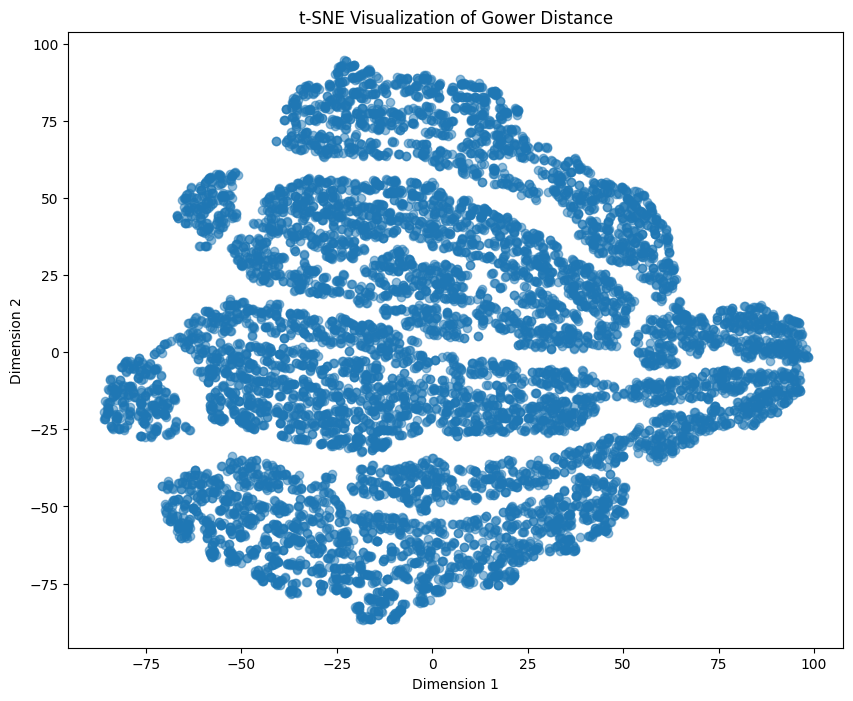

In [10]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# dimension reduction
tsne = TSNE(n_components=2, verbose=1, random_state=42)
data_tsne = tsne.fit_transform(df)

# scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], alpha=0.5) #first and second column
plt.title('t-SNE Visualization of Gower Distance')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

Elbow Method

In [ ]:
#import matplotlib.pyplot as plt
#from sklearn.cluster import KMeans
#wcss = []
#for i in range(10, 101, 10):
    #kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    #kmeans.fit(df)
    #wcss.append(kmeans.inertia_)
#plt.plot(range(10, 101, 10), wcss)
#plt.title('Elbow Method')
#plt.xlabel('Number of clusters')
#plt.ylabel('WCSS')
#plt.show()

running too long, no result. Suppose k = 300

DBSCNE

In [11]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Configuring the parameters of the clustering algorithm
dbscan_cluster = DBSCAN(eps=0.5,
                        min_samples=20,
                        metric="precomputed")
dbscan_cluster.fit(df)
dbscan_cluster.labels_

array([0, 0, 0, ..., 0, 0, 0])

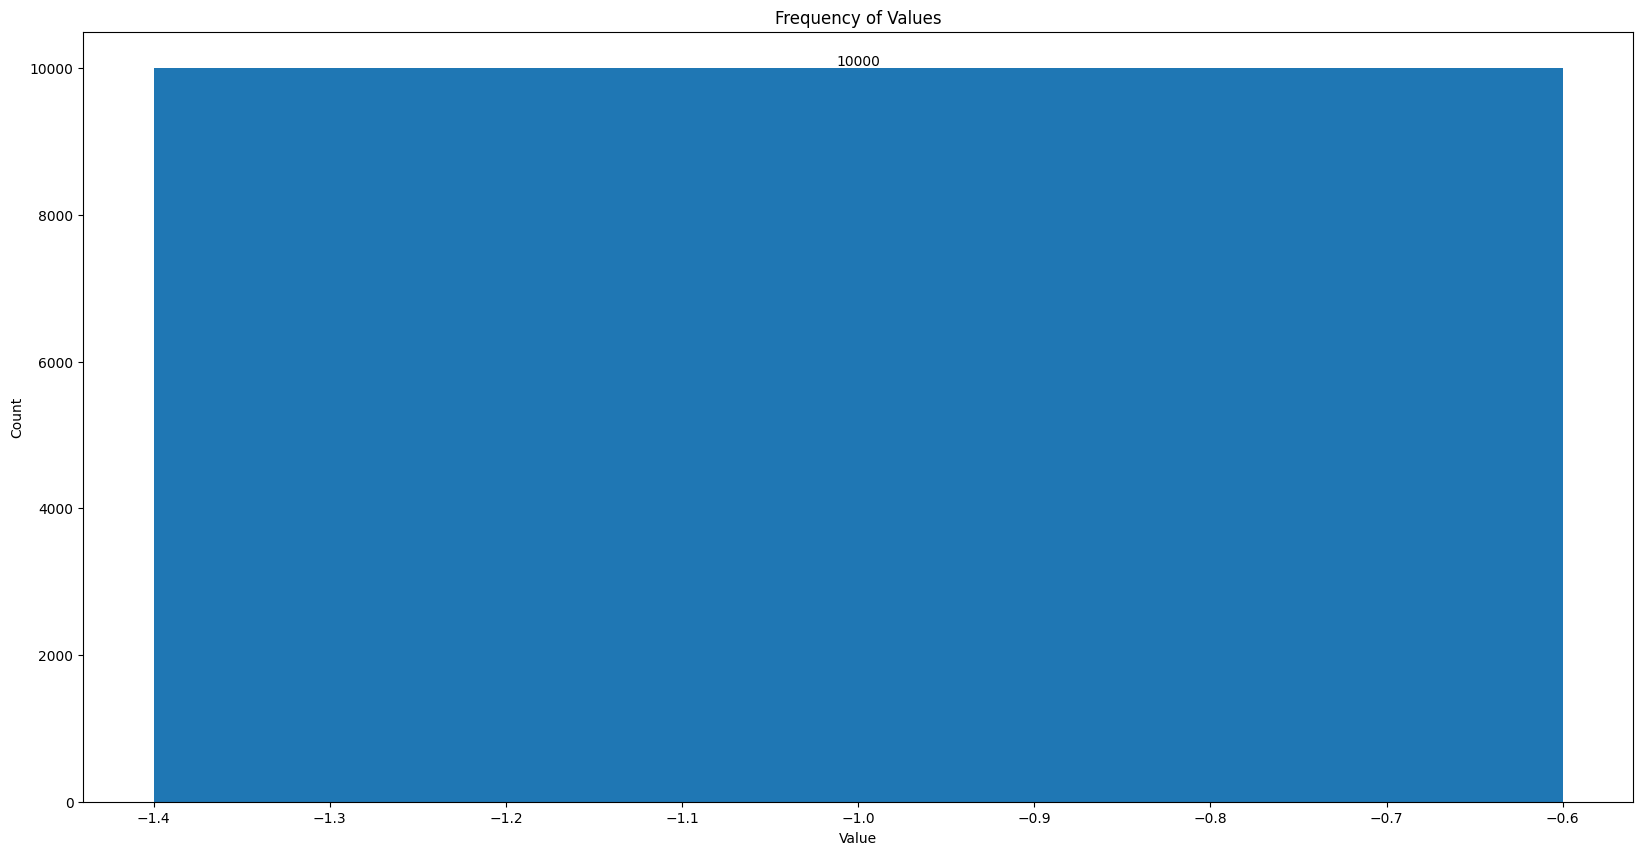

Max frequency: 10000
Min frequency: 10000
Mean frequency: 10000.0


In [28]:
import matplotlib.pyplot as plt

unique_values, counts = np.unique(dbscan_cluster.labels_, return_counts=True)
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(unique_values, counts)

ax.set_xlabel('Value')
ax.set_ylabel('Count')
ax.set_title('Frequency of Values')

for i in range(len(unique_values)):
    ax.text(unique_values[i], counts[i], str(counts[i]), ha='center', va='bottom')

plt.show()

# Calculate statistics
max_value = np.max(counts)
min_value = np.min(counts)
mean_value = np.mean(counts)

print("Max frequency:", max_value)
print("Min frequency:", min_value)
print("Mean frequency:", mean_value)

KMeans

In [29]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

km = KMeans(n_clusters=300, init='k-means++', max_iter=300, n_init=10, random_state=0)
km.fit_predict(df)

score = silhouette_score(df, km.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.082


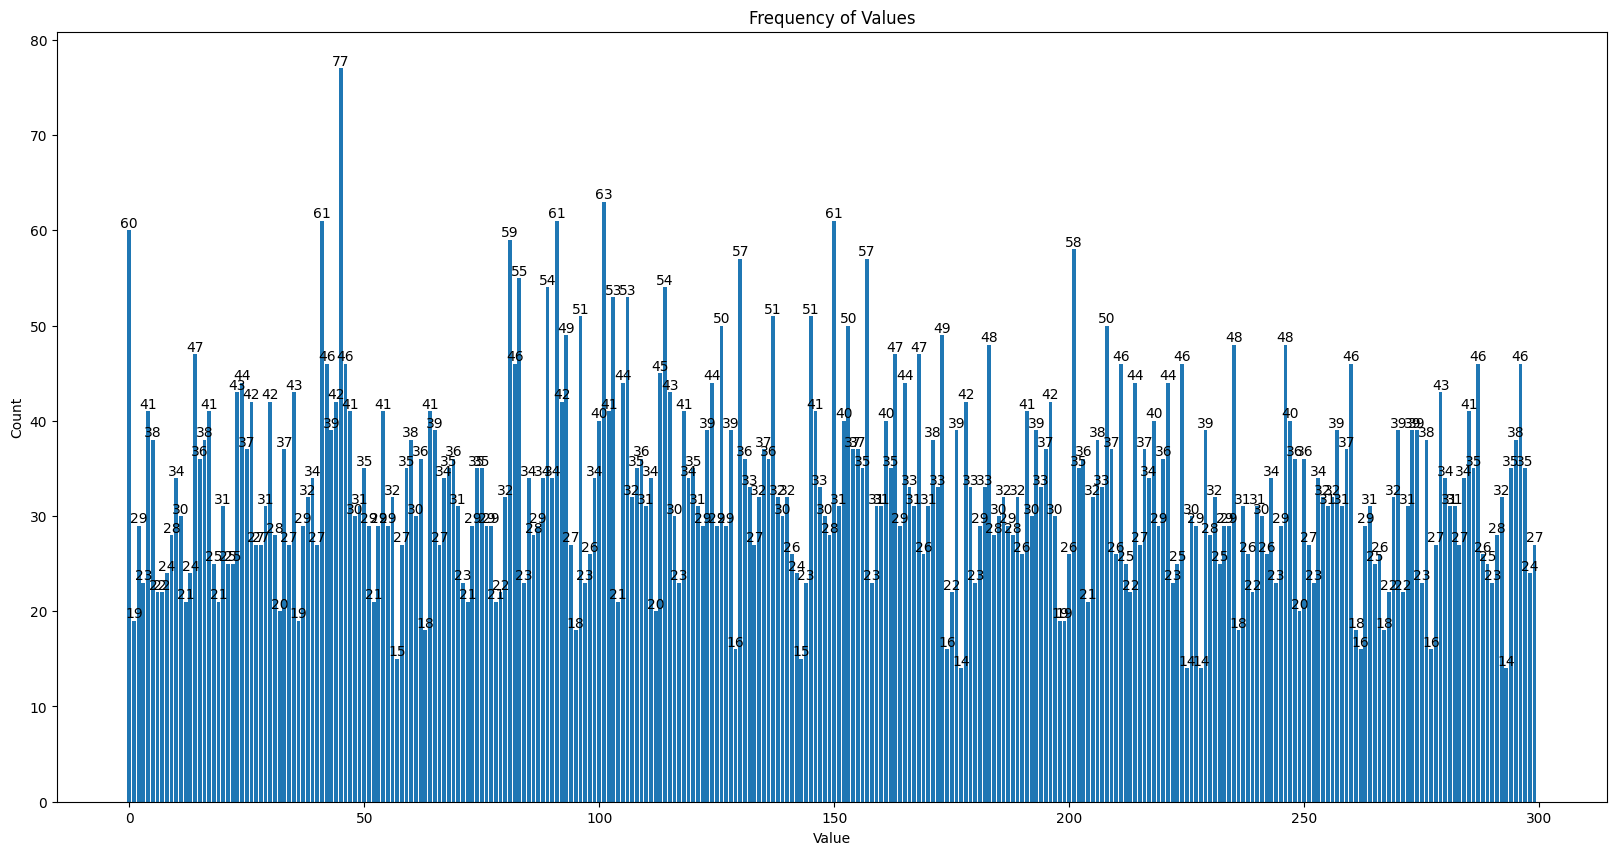

Max frequency: 77
Min frequency: 14
Mean frequency: 33.333333333333336


In [33]:
import matplotlib.pyplot as plt

unique_values, counts = np.unique(km.labels_, return_counts=True)
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(unique_values, counts)

ax.set_xlabel('Value')
ax.set_ylabel('Count')
ax.set_title('Frequency of Values')

for i in range(len(unique_values)):
    ax.text(unique_values[i], counts[i], str(counts[i]), ha='center', va='bottom')

plt.show()
# Calculate statistics
max_value = np.max(counts)
min_value = np.min(counts)
mean_value = np.mean(counts)

print("Max frequency:", max_value)
print("Min frequency:", min_value)
print("Mean frequency:", mean_value)

Mini Batch K-Means

In [31]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

batch_size = 1000
max_iter = 100
k = 300
kmeans = MiniBatchKMeans(n_clusters=k, batch_size=batch_size, max_iter=max_iter, random_state=0, n_init="auto")
kmeans.fit(df)

score = silhouette_score(df, kmeans.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.074


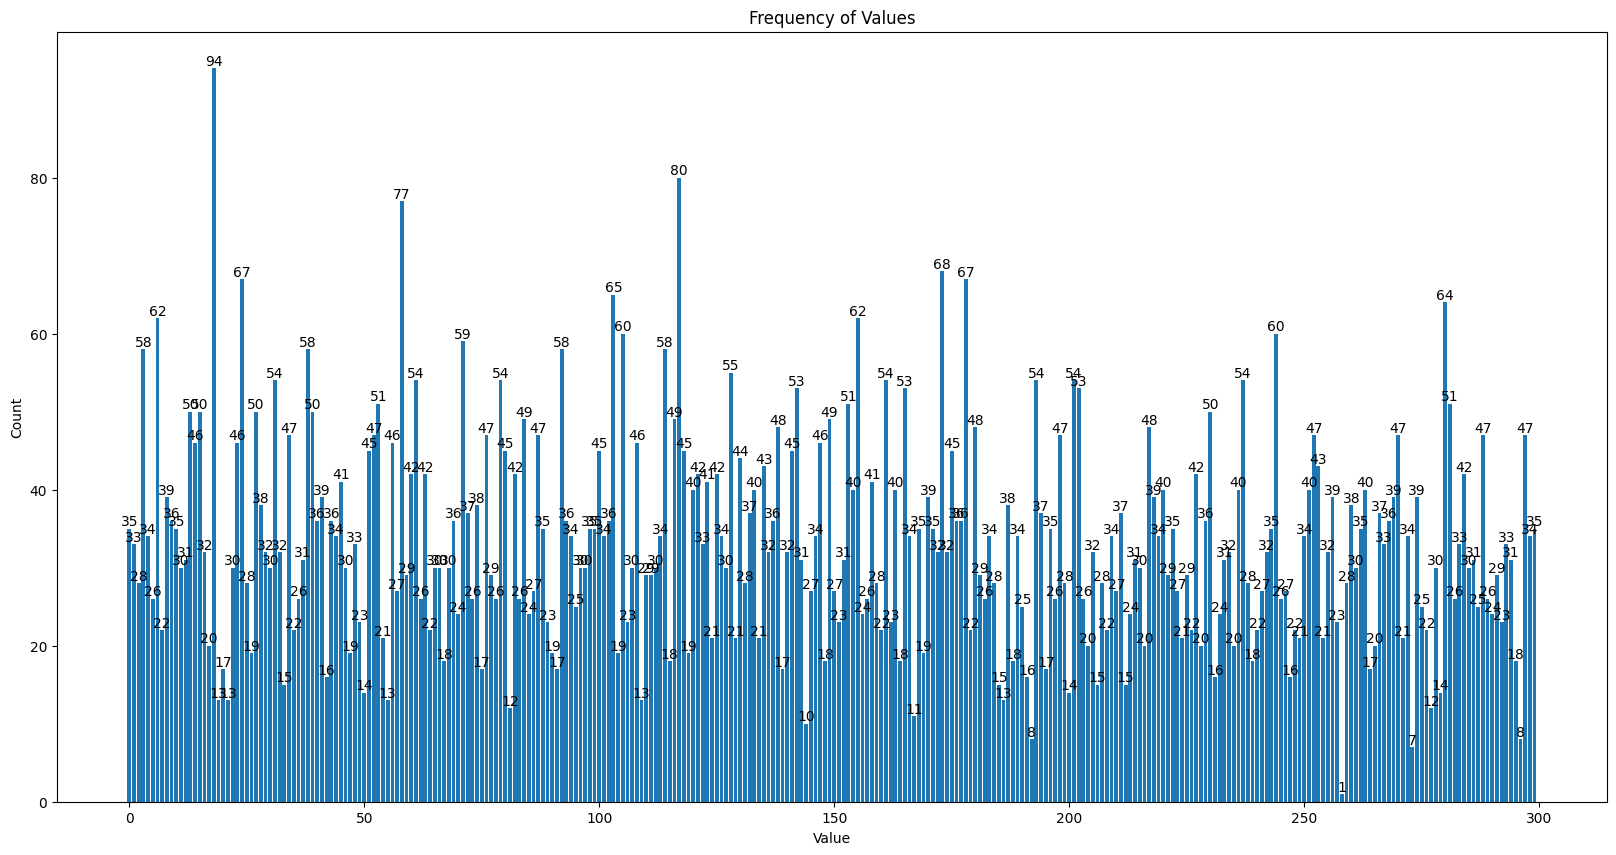

Max frequency: 94
Min frequency: 1
Mean frequency: 33.333333333333336


In [34]:
import matplotlib.pyplot as plt

unique_values, counts = np.unique(kmeans.labels_, return_counts=True)
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(unique_values, counts)

ax.set_xlabel('Value')
ax.set_ylabel('Count')
ax.set_title('Frequency of Values')

for i in range(len(unique_values)):
    ax.text(unique_values[i], counts[i], str(counts[i]), ha='center', va='bottom')

plt.show()
# Calculate statistics
max_value = np.max(counts)
min_value = np.min(counts)
mean_value = np.mean(counts)

print("Max frequency:", max_value)
print("Min frequency:", min_value)
print("Mean frequency:", mean_value)

GMM

In [ ]:
#from sklearn.mixture import GaussianMixture
#k = 300
#gmm = GaussianMixture(n_components=k, covariance_type='full').fit(df)
#prediction_gmm = gmm.predict(df)

#score = silhouette_score(df, prediction_gmm, metric='euclidean')
#print('Silhouetter Score: %.3f' % score)

Hierarchy

In [ ]:
#from sklearn.cluster import AgglomerativeClustering
#cluster = AgglomerativeClustering(n_clusters=300, affinity='euclidean', linkage='ward')
#labels = cluster.fit_predict(df).astype("int")

#score = silhouette_score(df, labels, metric='euclidean')
#print('Silhouetter Score: %.3f' % score)

Adjust Dataset into 0&1

In [17]:
# unselect columns need other actions
columns_to_expand = data.columns.difference(["Age", "Interests"])

# feature expension
expanded_data = pd.get_dummies(data[columns_to_expand], dummy_na=False)

# replace Nah
expanded_data.fillna(0, inplace=True)

# merge with original dataset
data_expanded = pd.concat([data[["Age", "Interests"]], expanded_data], axis=1)
data_expanded.head()

Age                Interests  Disability Status_No  Disability Status_Yes  \
0   77  attending social events                     1                      0   
1   91  attending social events                     0                      1   
2   71             taking walks                     1                      0   
3   81                  Reading                     0                      1   
4   73                  Reading                     1                      0   

   Ethnicity_Black  Ethnicity_East Asian or Southeast Asian  \
0                0                                        0   
1                0                                        0   
2                0                                        0   
3                0                                        0   
4                0                                        0   

   Ethnicity_Indigenous  Ethnicity_Latian American  Ethnicity_Other  \
0                     0                          0                0   
1                     0                          0                0   
2                     0                          0                0   
3                     0                          0                0   
4                     0                          0                0   

   Ethnicity_South Asian  ...  issue2_ Asthma  issue2_ COPD  issue2_ Cancer  \
0                      0  ...               0             0               0   
1                      0  ...               0             0               0   
2                      0  ...               0             0               0   
3                      0  ...               0             0               1   
4                      0  ...               0             0               0   

   issue2_ Diabetes  issue2_ Hypertension  issue2_ Ischemic Heart Disease  \
0                 0                     0                               1   
1                 0                     1                               0   
2                 0                     0                               0   
3                 0                     0                               0   
4                 0                     1                               0   

   issue2_ Mood & Anxiety Disorders  issue2_ Osteoarthritis  \
0                                 0                       0   
1                                 0                       0   
2                                 0                       1   
3                                 0                       0   
4                                 0                       0   

   issue2_ Osteoporosis  issue2_ Periodontal Disease  
0                     0                            0  
1                     0                            0  
2                     0                            0  
3                     0                            0  
4                     0                            0  

[5 rows x 53 columns]

In [18]:
# set age labels
ranges = [(65, 68), (69, 72), (73, 76), (77, 80), (81, 85), (86, 90), (91, 95), (96, 100)]
labels = [f"Age_{i+1}" for i in range(len(ranges))]

expanded_data = pd.DataFrame()

# feature expension
for i, (start, end) in enumerate(ranges):
    expanded_data[labels[i]] = data_expanded["Age"].apply(lambda x: 1 if start <= x <= end else 0)

# merge with old data
expanded_data = pd.concat([expanded_data, data_expanded.iloc[:, 1:]], axis=1)
expanded_data.head()

Age_1  Age_2  Age_3  Age_4  Age_5  Age_6  Age_7  Age_8  \
0      0      0      0      1      0      0      0      0   
1      0      0      0      0      0      0      1      0   
2      0      1      0      0      0      0      0      0   
3      0      0      0      0      1      0      0      0   
4      0      0      1      0      0      0      0      0   

                 Interests  Disability Status_No  ...  issue2_ Asthma  \
0  attending social events                     1  ...               0   
1  attending social events                     0  ...               0   
2             taking walks                     1  ...               0   
3                  Reading                     0  ...               0   
4                  Reading                     1  ...               0   

   issue2_ COPD  issue2_ Cancer  issue2_ Diabetes  issue2_ Hypertension  \
0             0               0                 0                     0   
1             0               0                 0                     1   
2             0               0                 0                     0   
3             0               1                 0                     0   
4             0               0                 0                     1   

   issue2_ Ischemic Heart Disease  issue2_ Mood & Anxiety Disorders  \
0                               1                                 0   
1                               0                                 0   
2                               0                                 0   
3                               0                                 0   
4                               0                                 0   

   issue2_ Osteoarthritis  issue2_ Osteoporosis  issue2_ Periodontal Disease  
0                       0                     0                            0  
1                       0                     0                            0  
2                       1                     0                            0  
3                       0                     0                            0  
4                       0                     0                            0  

[5 rows x 60 columns]

In [19]:
#rename columns
new_column_names = {
    'Age_1': '65-68',
    'Age_2': '69-72',
    'Age_3': '73-76',
    'Age_4': '77-80',
    'Age_5': '81-85',
    'Age_6': '86-90',
    'Age_7': '91-95',
    'Age_8': '96-100',
}
expanded_data.rename(columns=new_column_names, inplace=True)
expanded_data.head()

65-68  69-72  73-76  77-80  81-85  86-90  91-95  96-100  \
0      0      0      0      1      0      0      0       0   
1      0      0      0      0      0      0      1       0   
2      0      1      0      0      0      0      0       0   
3      0      0      0      0      1      0      0       0   
4      0      0      1      0      0      0      0       0   

                 Interests  Disability Status_No  ...  issue2_ Asthma  \
0  attending social events                     1  ...               0   
1  attending social events                     0  ...               0   
2             taking walks                     1  ...               0   
3                  Reading                     0  ...               0   
4                  Reading                     1  ...               0   

   issue2_ COPD  issue2_ Cancer  issue2_ Diabetes  issue2_ Hypertension  \
0             0               0                 0                     0   
1             0               0                 0                     1   
2             0               0                 0                     0   
3             0               1                 0                     0   
4             0               0                 0                     1   

   issue2_ Ischemic Heart Disease  issue2_ Mood & Anxiety Disorders  \
0                               1                                 0   
1                               0                                 0   
2                               0                                 0   
3                               0                                 0   
4                               0                                 0   

   issue2_ Osteoarthritis  issue2_ Osteoporosis  issue2_ Periodontal Disease  
0                       0                     0                            0  
1                       0                     0                            0  
2                       1                     0                            0  
3                       0                     0                            0  
4                       0                     0                            0  

[5 rows x 60 columns]

In [20]:
# copy other columns to a new dataframe
data_expanded_new = expanded_data.drop('Interests', axis=1).copy()

# change other interests to 'others' according to the list
interests_to_keep = ['attending social events', 'volunteering', 'taking walks', 'doing crossword puzzles', 'Reading', 'listening to music', 'Fitness and Exercise']
data_expanded['Interests'] = data_expanded['Interests'].apply(lambda x: x if x in interests_to_keep else 'others')

# feature expension
expanded_interests = pd.get_dummies(data_expanded['Interests'], prefix='Interest')

# merge with old data
data_expanded_new = pd.concat([data_expanded_new, expanded_interests], axis=1)
data_expanded_new.head()

65-68  69-72  73-76  77-80  81-85  86-90  91-95  96-100  \
0      0      0      0      1      0      0      0       0   
1      0      0      0      0      0      0      1       0   
2      0      1      0      0      0      0      0       0   
3      0      0      0      0      1      0      0       0   
4      0      0      1      0      0      0      0       0   

   Disability Status_No  Disability Status_Yes  ...  issue2_ Osteoporosis  \
0                     1                      0  ...                     0   
1                     0                      1  ...                     0   
2                     1                      0  ...                     0   
3                     0                      1  ...                     0   
4                     1                      0  ...                     0   

   issue2_ Periodontal Disease  Interest_Fitness and Exercise  \
0                            0                              0   
1                            0                              0   
2                            0                              0   
3                            0                              0   
4                            0                              0   

   Interest_Reading  Interest_attending social events  \
0                 0                                 1   
1                 0                                 1   
2                 0                                 0   
3                 1                                 0   
4                 1                                 0   

   Interest_doing crossword puzzles  Interest_listening to music  \
0                                 0                            0   
1                                 0                            0   
2                                 0                            0   
3                                 0                            0   
4                                 0                            0   

   Interest_others  Interest_taking walks  Interest_volunteering  
0                0                      0                      0  
1                0                      0                      0  
2                0                      1                      0  
3                0                      0                      0  
4                0                      0                      0  

[5 rows x 67 columns]

In [21]:
output_filename = '0&1dataset.csv'
data_expanded_new.to_csv(output_filename, index=False)

In [35]:
import pandas as pd
data = pd.read_csv('0&1dataset.csv')
data.head()

65-68  69-72  73-76  77-80  81-85  86-90  91-95  96-100  \
0      0      0      0      1      0      0      0       0   
1      0      0      0      0      0      0      1       0   
2      0      1      0      0      0      0      0       0   
3      0      0      0      0      1      0      0       0   
4      0      0      1      0      0      0      0       0   

   Disability Status_No  Disability Status_Yes  ...  issue2_ Osteoporosis  \
0                     1                      0  ...                     0   
1                     0                      1  ...                     0   
2                     1                      0  ...                     0   
3                     0                      1  ...                     0   
4                     1                      0  ...                     0   

   issue2_ Periodontal Disease  Interest_Fitness and Exercise  \
0                            0                              0   
1                            0                              0   
2                            0                              0   
3                            0                              0   
4                            0                              0   

   Interest_Reading  Interest_attending social events  \
0                 0                                 1   
1                 0                                 1   
2                 0                                 0   
3                 1                                 0   
4                 1                                 0   

   Interest_doing crossword puzzles  Interest_listening to music  \
0                                 0                            0   
1                                 0                            0   
2                                 0                            0   
3                                 0                            0   
4                                 0                            0   

   Interest_others  Interest_taking walks  Interest_volunteering  
0                0                      0                      0  
1                0                      0                      0  
2                0                      1                      0  
3                0                      0                      0  
4                0                      0                      0  

[5 rows x 67 columns]

TSNE

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.001s...
[t-SNE] Computed neighbors for 10000 samples in 1.335s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.818747
[t-SNE] KL divergence after 100 iterations with early exaggeration: 97.336952
[t-SNE] KL divergence after 1000 iterations: 3.295630


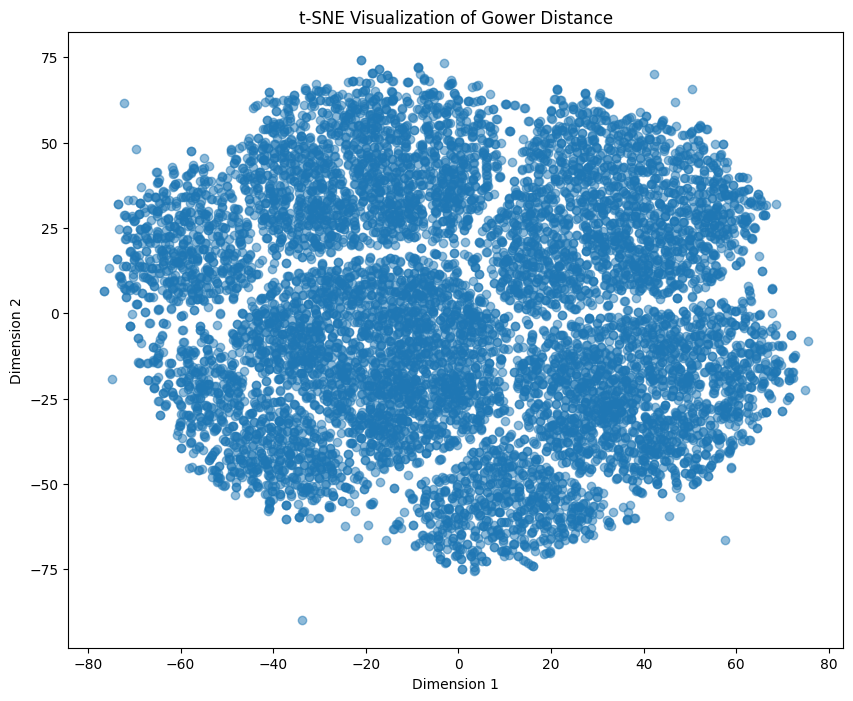

In [ ]:
from sklearn.manifold import TSNE

# dimension reduction
tsne = TSNE(n_components=2, verbose=1, random_state=42)
data_tsne = tsne.fit_transform(data)

# scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], alpha=0.5) #first and second column
plt.title('t-SNE Visualization of 0&1 Dataset')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

DBSCNE

In [23]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Configuring the parameters of the clustering algorithm
dbscan_cluster = DBSCAN(eps=0.5, min_samples=20)
dbscan_cluster.fit(data)

dbscan_cluster.labels_

array([-1, -1, -1, ..., -1, -1, -1])

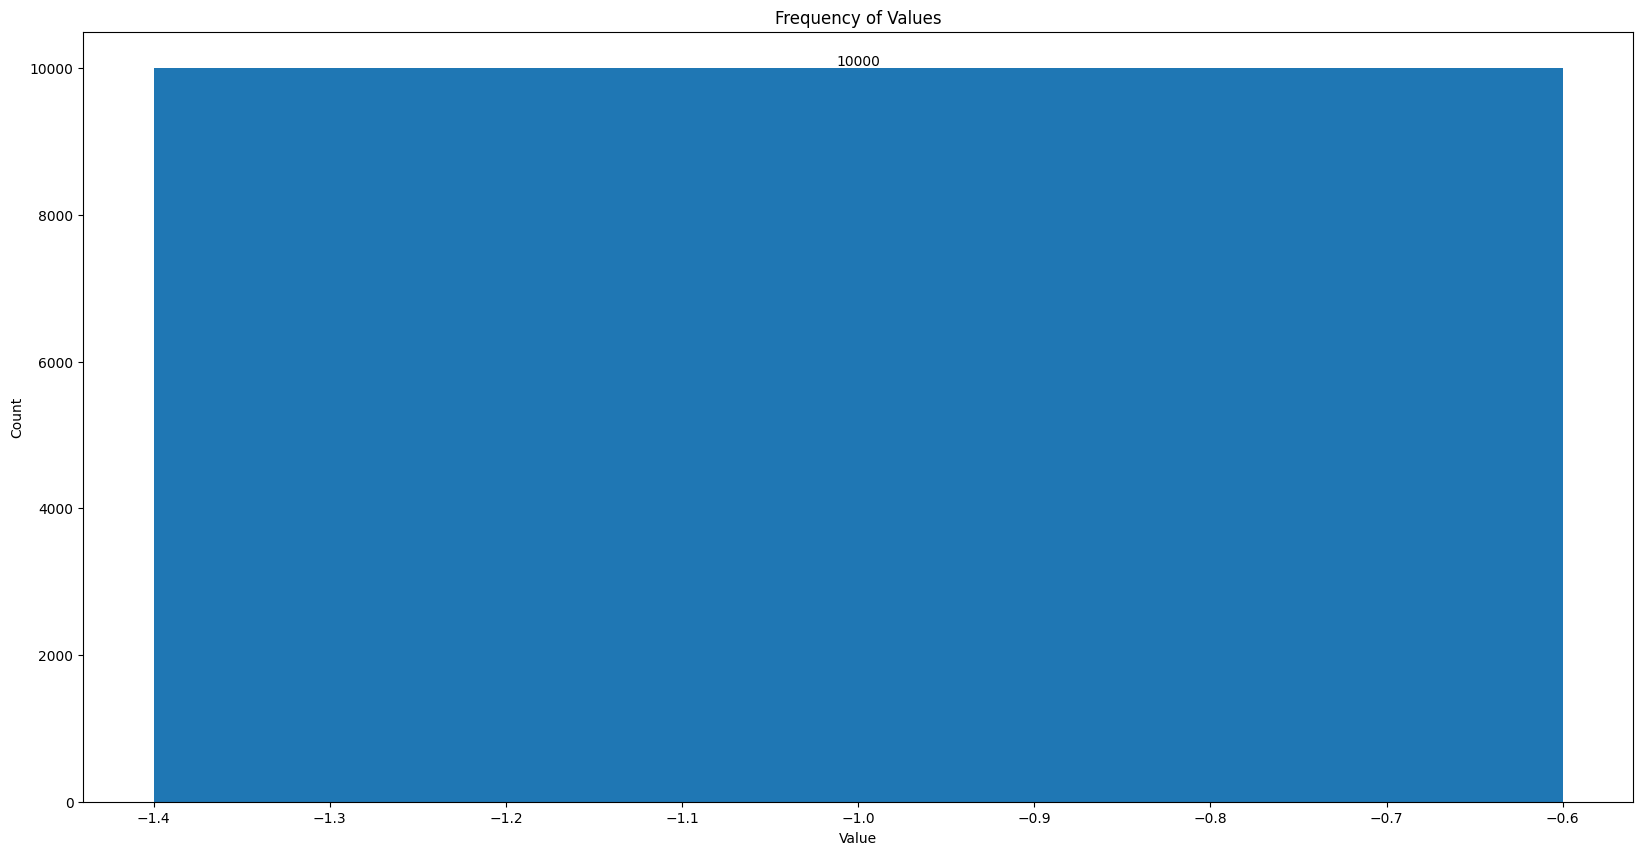

count        1.0
mean     10000.0
std          NaN
min      10000.0
25%      10000.0
50%      10000.0
75%      10000.0
max      10000.0
dtype: float64


In [24]:
import matplotlib.pyplot as plt

unique_values, counts = np.unique(dbscan_cluster.labels_, return_counts=True)
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(unique_values, counts)

ax.set_xlabel('Value')
ax.set_ylabel('Count')
ax.set_title('Frequency of Values')

for i in range(len(unique_values)):
    ax.text(unique_values[i], counts[i], str(counts[i]), ha='center', va='bottom')

plt.show()
# Calculate statistics
max_value = np.max(counts)
min_value = np.min(counts)
mean_value = np.mean(counts)

print("Max frequency:", max_value)
print("Min frequency:", min_value)
print("Mean frequency:", mean_value)

KMeans

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(10, 1001, 50):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(10, 1001, 50), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [36]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

km = KMeans(n_clusters=150, init='k-means++', max_iter=300, n_init=10, random_state=0)
km.fit_predict(data)

score = silhouette_score(data, km.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.043


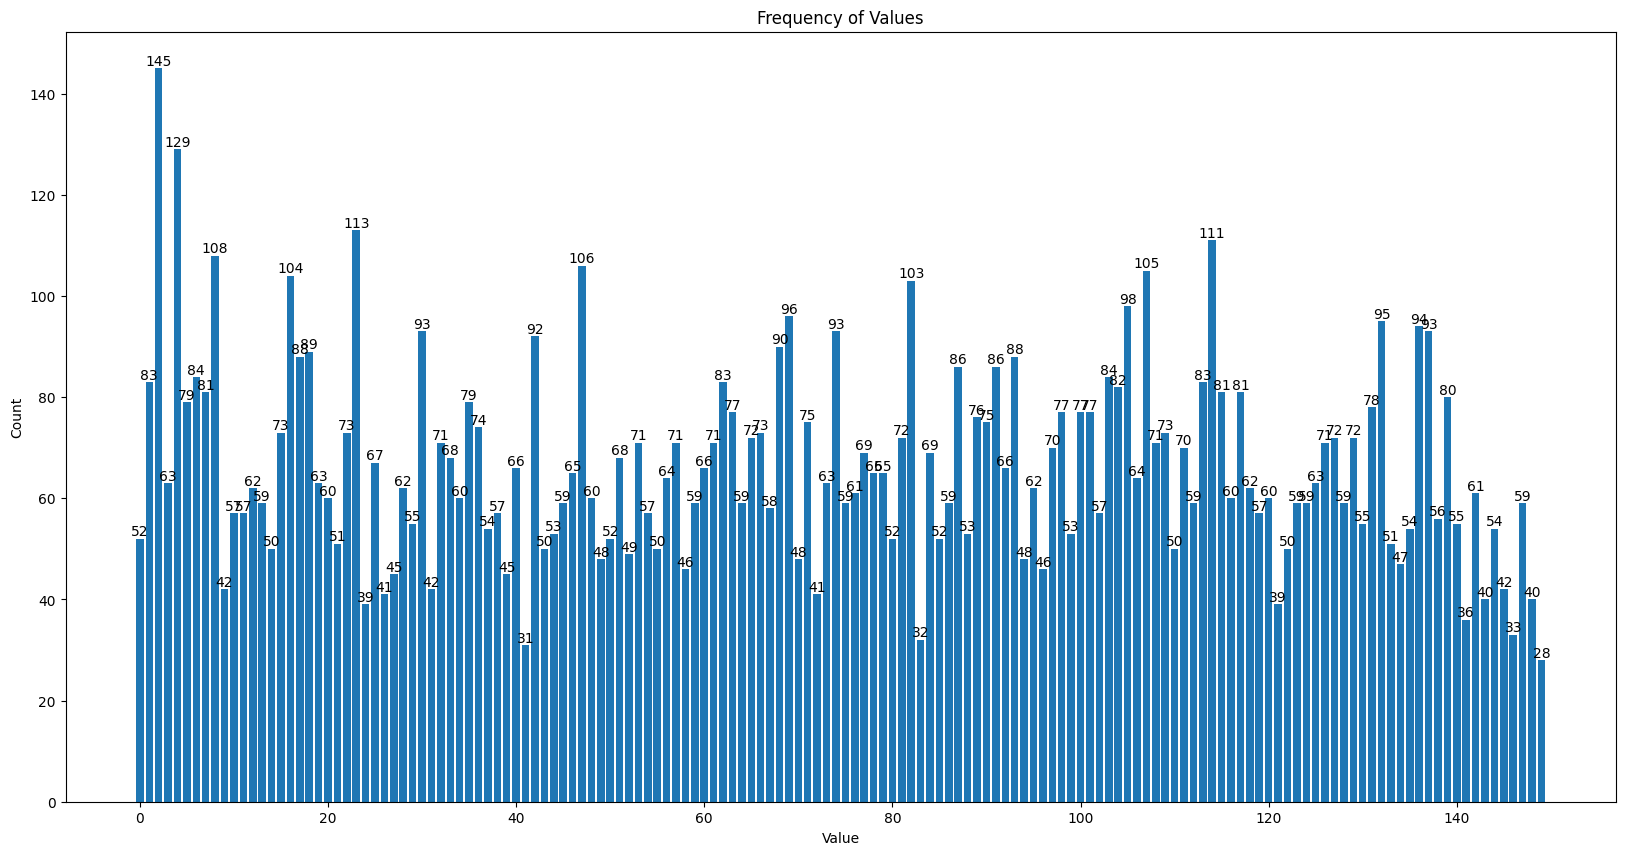

Max frequency: 145
Min frequency: 28
Mean frequency: 66.66666666666667


In [37]:
import matplotlib.pyplot as plt
import numpy as np

unique_values, counts = np.unique(km.labels_, return_counts=True)
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(unique_values, counts)

ax.set_xlabel('Value')
ax.set_ylabel('Count')
ax.set_title('Frequency of Values')

for i in range(len(unique_values)):
    ax.text(unique_values[i], counts[i], str(counts[i]), ha='center', va='bottom')

plt.show()
# Calculate statistics
max_value = np.max(counts)
min_value = np.min(counts)
mean_value = np.mean(counts)

print("Max frequency:", max_value)
print("Min frequency:", min_value)
print("Mean frequency:", mean_value)

Mini Batch KMeans

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
wcss = []
for i in range(10, 1001, 50):
    kmeans = MiniBatchKMeans(n_clusters=i, batch_size=1000, max_iter=100, random_state=0, n_init="auto")
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(10, 1001, 50), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [38]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

batch_size = 1000
max_iter = 100
k = 100
kmeans = MiniBatchKMeans(n_clusters=k, batch_size=batch_size, max_iter=max_iter, random_state=0, n_init="auto")
kmeans.fit(data)

score = silhouette_score(data, kmeans.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.038


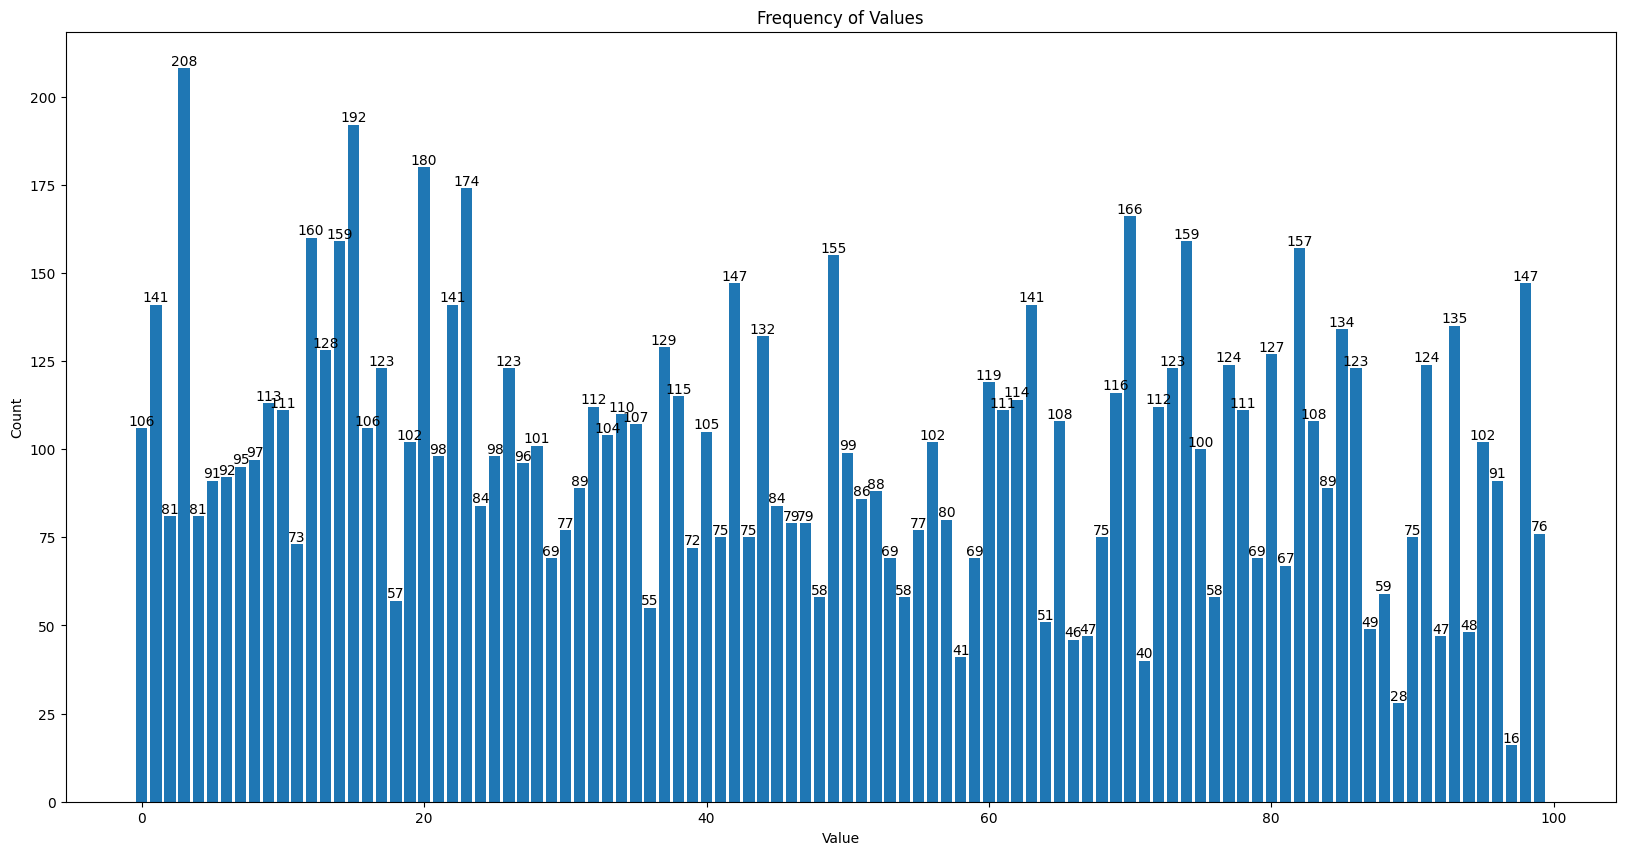

Max frequency: 208
Min frequency: 16
Mean frequency: 100.0


In [39]:
import matplotlib.pyplot as plt
import numpy as np

unique_values, counts = np.unique(kmeans.labels_, return_counts=True)
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(unique_values, counts)

ax.set_xlabel('Value')
ax.set_ylabel('Count')
ax.set_title('Frequency of Values')

for i in range(len(unique_values)):
    ax.text(unique_values[i], counts[i], str(counts[i]), ha='center', va='bottom')

plt.show()
# Calculate statistics
max_value = np.max(counts)
min_value = np.min(counts)
mean_value = np.mean(counts)

print("Max frequency:", max_value)
print("Min frequency:", min_value)
print("Mean frequency:", mean_value)

GMM

In [40]:
from sklearn.mixture import GaussianMixture
k = 200
gmm = GaussianMixture(n_components=k, covariance_type='full').fit(data)
prediction_gmm = gmm.predict(data)

score = silhouette_score(data, prediction_gmm, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.038


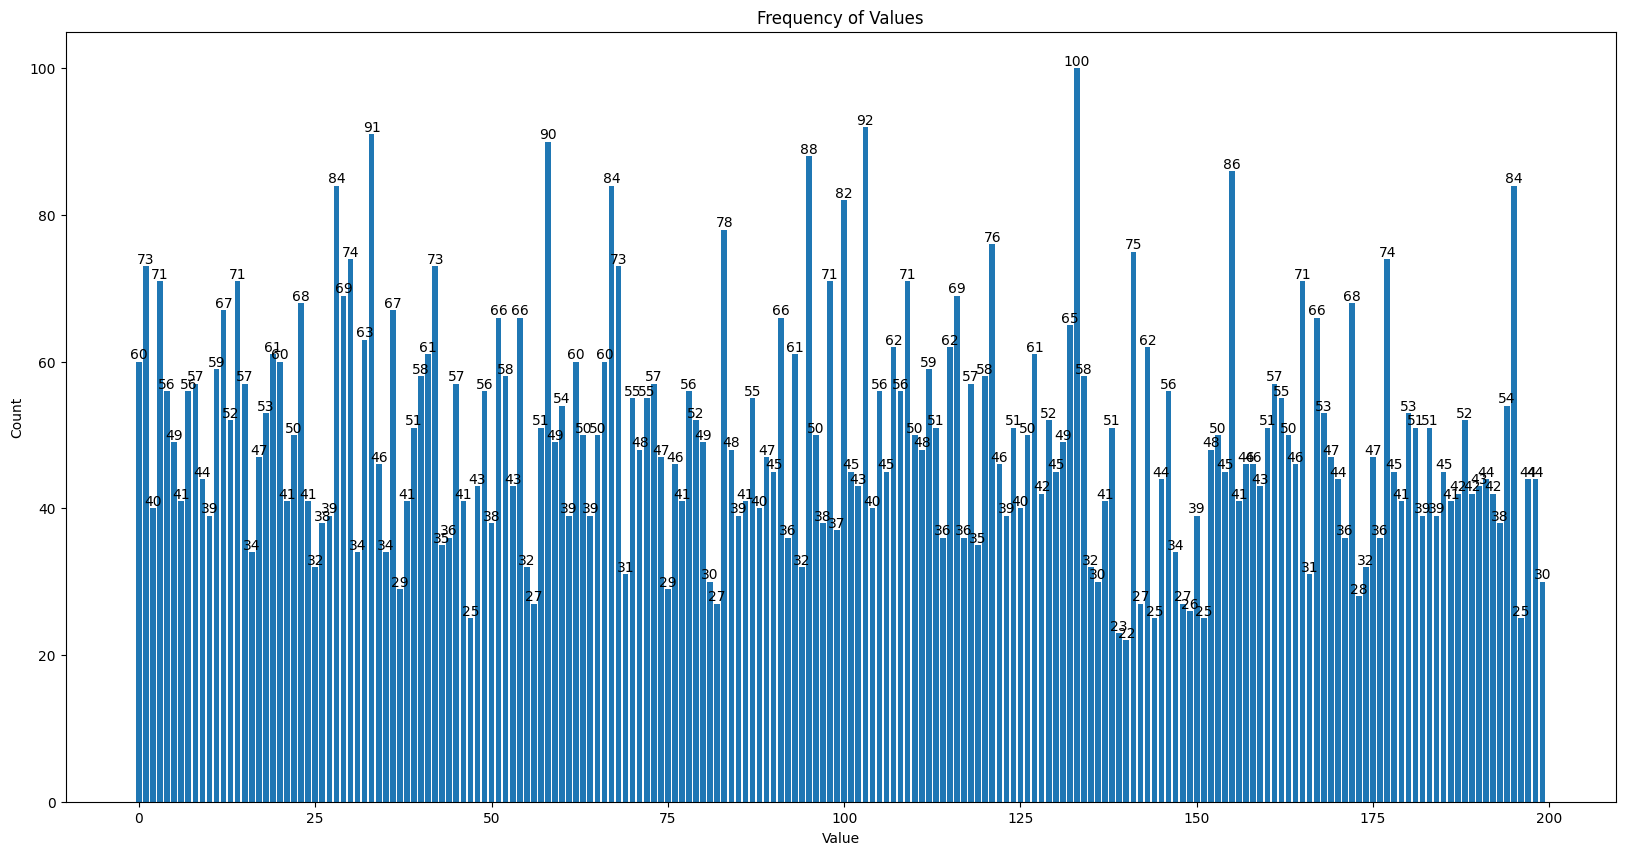

Max frequency: 100
Min frequency: 22
Mean frequency: 50.0


In [41]:
import matplotlib.pyplot as plt
import numpy as np

unique_values, counts = np.unique(prediction_gmm, return_counts=True)
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(unique_values, counts)

ax.set_xlabel('Value')
ax.set_ylabel('Count')
ax.set_title('Frequency of Values')

for i in range(len(unique_values)):
    ax.text(unique_values[i], counts[i], str(counts[i]), ha='center', va='bottom')

plt.show()
# Calculate statistics
max_value = np.max(counts)
min_value = np.min(counts)
mean_value = np.mean(counts)

print("Max frequency:", max_value)
print("Min frequency:", min_value)
print("Mean frequency:", mean_value)

Hierarchy

In [42]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

cluster = AgglomerativeClustering(n_clusters=300, affinity='euclidean', linkage='ward')
labels = cluster.fit_predict(data).astype("int")

score = silhouette_score(data, labels, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Silhouetter Score: 0.010


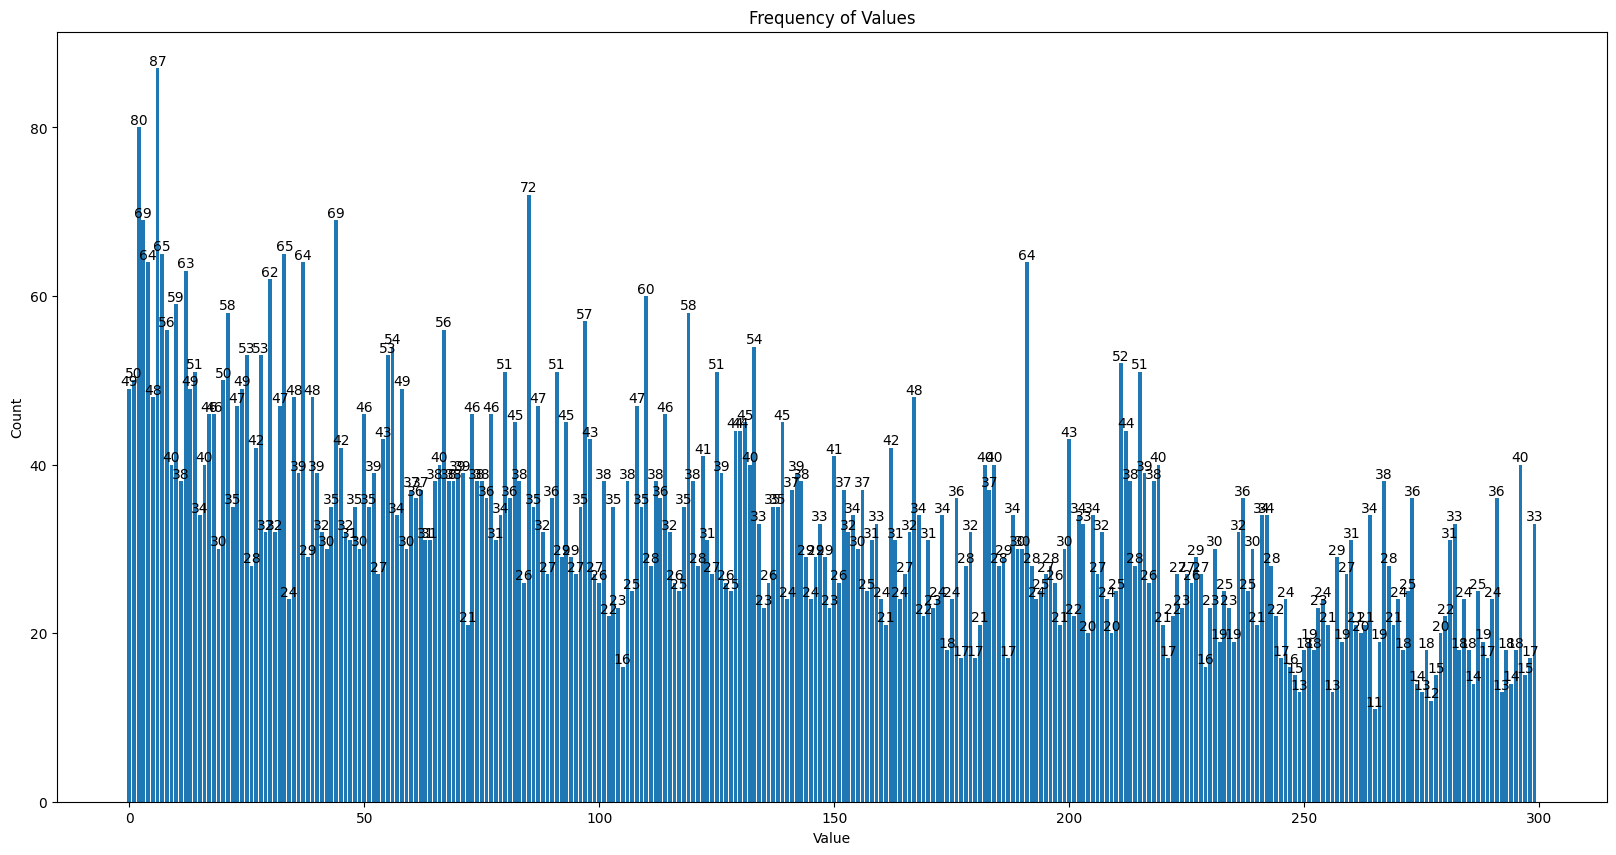

Max frequency: 87
Min frequency: 11
Mean frequency: 33.333333333333336


In [43]:
import matplotlib.pyplot as plt
import numpy as np

unique_values, counts = np.unique(labels, return_counts=True)
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(unique_values, counts)

ax.set_xlabel('Value')
ax.set_ylabel('Count')
ax.set_title('Frequency of Values')

for i in range(len(unique_values)):
    ax.text(unique_values[i], counts[i], str(counts[i]), ha='center', va='bottom')

plt.show()
# Calculate statistics
max_value = np.max(counts)
min_value = np.min(counts)
mean_value = np.mean(counts)

print("Max frequency:", max_value)
print("Min frequency:", min_value)
print("Mean frequency:", mean_value)

Columns select according to variance (top30%)

In [44]:
import pandas as pd
import numpy as np

variances = data.var()
mean_variance = variances.mean()
std_deviation = np.std(variances)

print("Columns Variance:")
print(variances)
print("Mean Variance:")
print(mean_variance)
print("Standard Deviation:")
print(std_deviation)

Columns Variance:
65-68                               0.179793
69-72                               0.176631
73-76                               0.141180
77-80                               0.103091
81-85                               0.113259
                                      ...   
Interest_doing crossword puzzles    0.109386
Interest_listening to music         0.083708
Interest_others                     0.140850
Interest_taking walks               0.116933
Interest_volunteering               0.129881
Length: 67, dtype: float64
Mean Variance:
0.11932629770439732
Standard Deviation:
0.07258017183951669


In [45]:
threshold = np.percentile(variances, 70)
filtered_columns = variances[variances >= threshold].index
filtered_data = data[filtered_columns]
filtered_data.head()

65-68  69-72  Disability Status_No  Disability Status_Yes  Gender_Female  \
0      0      0                     1                      0              1   
1      0      0                     0                      1              0   
2      0      1                     1                      0              1   
3      0      0                     0                      1              0   
4      0      0                     1                      0              1   

   Gender_Male  Living Alone_No  Living Alone_Yes  \
0            0                1                 0   
1            1                1                 0   
2            0                1                 0   
3            1                0                 1   
4            0                1                 0   

   Marital Status_Married or Cohabiting  Residence Type_Rural  \
0                                     1                     0   
1                                     1                     0   
2                                     0                     0   
3                                     1                     0   
4                                     1                     0   

   Residence Type_Urban  Sleep Hours_Less Than Sleep Rules  \
0                     1                                  0   
1                     1                                  0   
2                     1                                  0   
3                     1                                  0   
4                     1                                  0   

   Sleep Hours_Meet Sleep Rules  Sleep Quality_Daytime Sleepiness  \
0                             1                                 0   
1                             1                                 0   
2                             1                                 0   
3                             1                                 1   
4                             1                                 0   

   Sleep Quality_Good  Sleep Quality_Occasionally Difficulty Falling Asleep  \
0                   1                                                  0      
1                   1                                                  0      
2                   0                                                  1      
3                   0                                                  0      
4                   0                                                  1      

   Social Condition_Normal  Social Condition_Occasionally Lonely  \
0                        1                                     0   
1                        0                                     1   
2                        0                                     0   
3                        1                                     0   
4                        1                                     0   

   issue1_Hypertension  issue2_ Hypertension  
0                    0                     0  
1                    1                     1  
2                    0                     0  
3                    0                     0  
4                    0                     1

In [46]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   65-68                                                 10000 non-null  int64
 1   69-72                                                 10000 non-null  int64
 2   Disability Status_No                                  10000 non-null  int64
 3   Disability Status_Yes                                 10000 non-null  int64
 4   Gender_Female                                         10000 non-null  int64
 5   Gender_Male                                           10000 non-null  int64
 6   Living Alone_No                                       10000 non-null  int64
 7   Living Alone_Yes                                      10000 non-null  int64
 8   Marital Status_Married or Cohabiting                  10000 non-null  int64
 

TSNE

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.001s...
[t-SNE] Computed neighbors for 10000 samples in 0.809s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.916153
[t-SNE] KL divergence after 1000 iterations: 0.954571


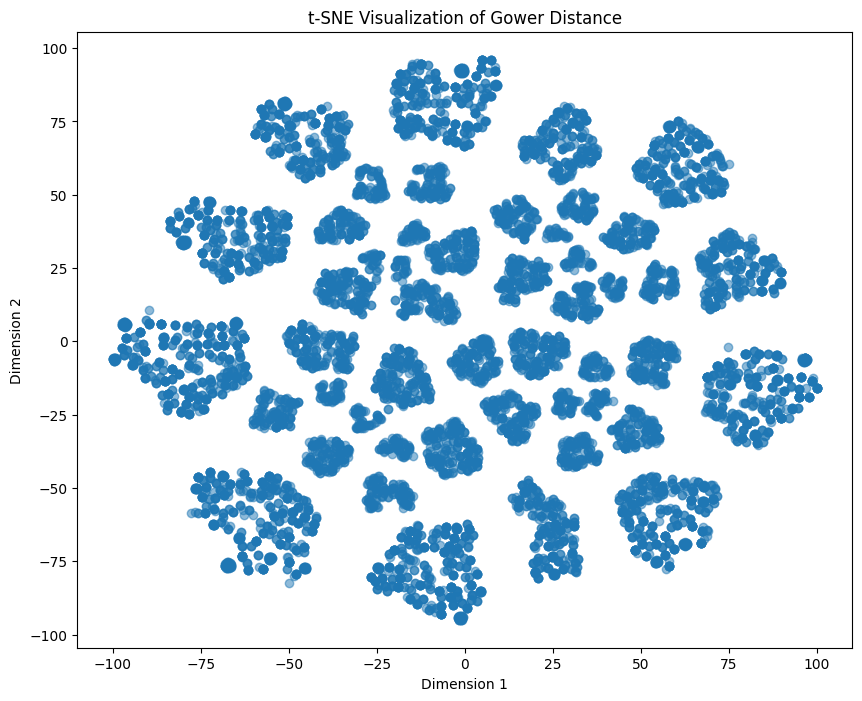

In [ ]:
from sklearn.manifold import TSNE

# dimension reduction
tsne = TSNE(n_components=2, verbose=1, random_state=42)
data_tsne = tsne.fit_transform(filtered_data)

# scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], alpha=0.5) #first and second column
plt.title('t-SNE Visualization of 0&1 Selected Dataset')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

DBSCNE

In [47]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Configuring the parameters of the clustering algorithm
dbscan_cluster = DBSCAN(eps=0.5, min_samples=30)
dbscan_cluster.fit(filtered_data)

dbscan_cluster.labels_

score = silhouette_score(filtered_data, dbscan_cluster.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: -0.250


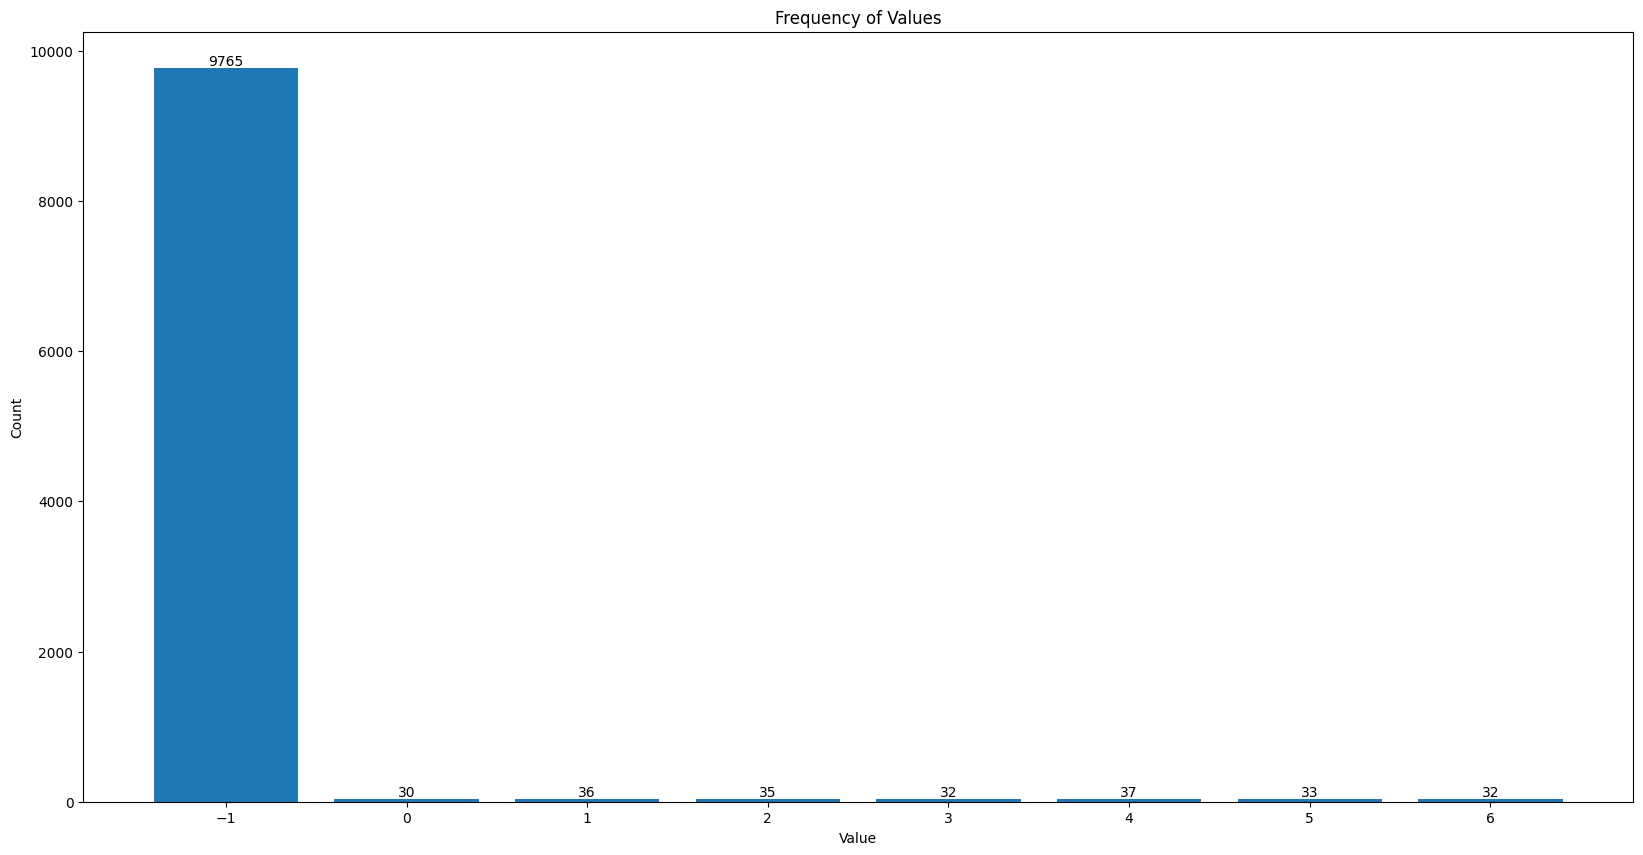

Max frequency: 9765
Min frequency: 30
Mean frequency: 1250.0


In [48]:
import matplotlib.pyplot as plt

unique_values, counts = np.unique(dbscan_cluster.labels_, return_counts=True)
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(unique_values, counts)

ax.set_xlabel('Value')
ax.set_ylabel('Count')
ax.set_title('Frequency of Values')

for i in range(len(unique_values)):
    ax.text(unique_values[i], counts[i], str(counts[i]), ha='center', va='bottom')

plt.show()
# Calculate statistics
max_value = np.max(counts)
min_value = np.min(counts)
mean_value = np.mean(counts)

print("Max frequency:", max_value)
print("Min frequency:", min_value)
print("Mean frequency:", mean_value)

In [49]:
# Extracting outliers
outlier_labels = dbscan_cluster.labels_ == -1
outlier_data = filtered_data[outlier_labels]

# Applying clustering on outliers
outlier_cluster = DBSCAN(eps=0.5, min_samples=30)
outlier_cluster.fit(outlier_data)
outlier_cluster.labels_

array([-1, -1, -1, ..., -1, -1, -1])

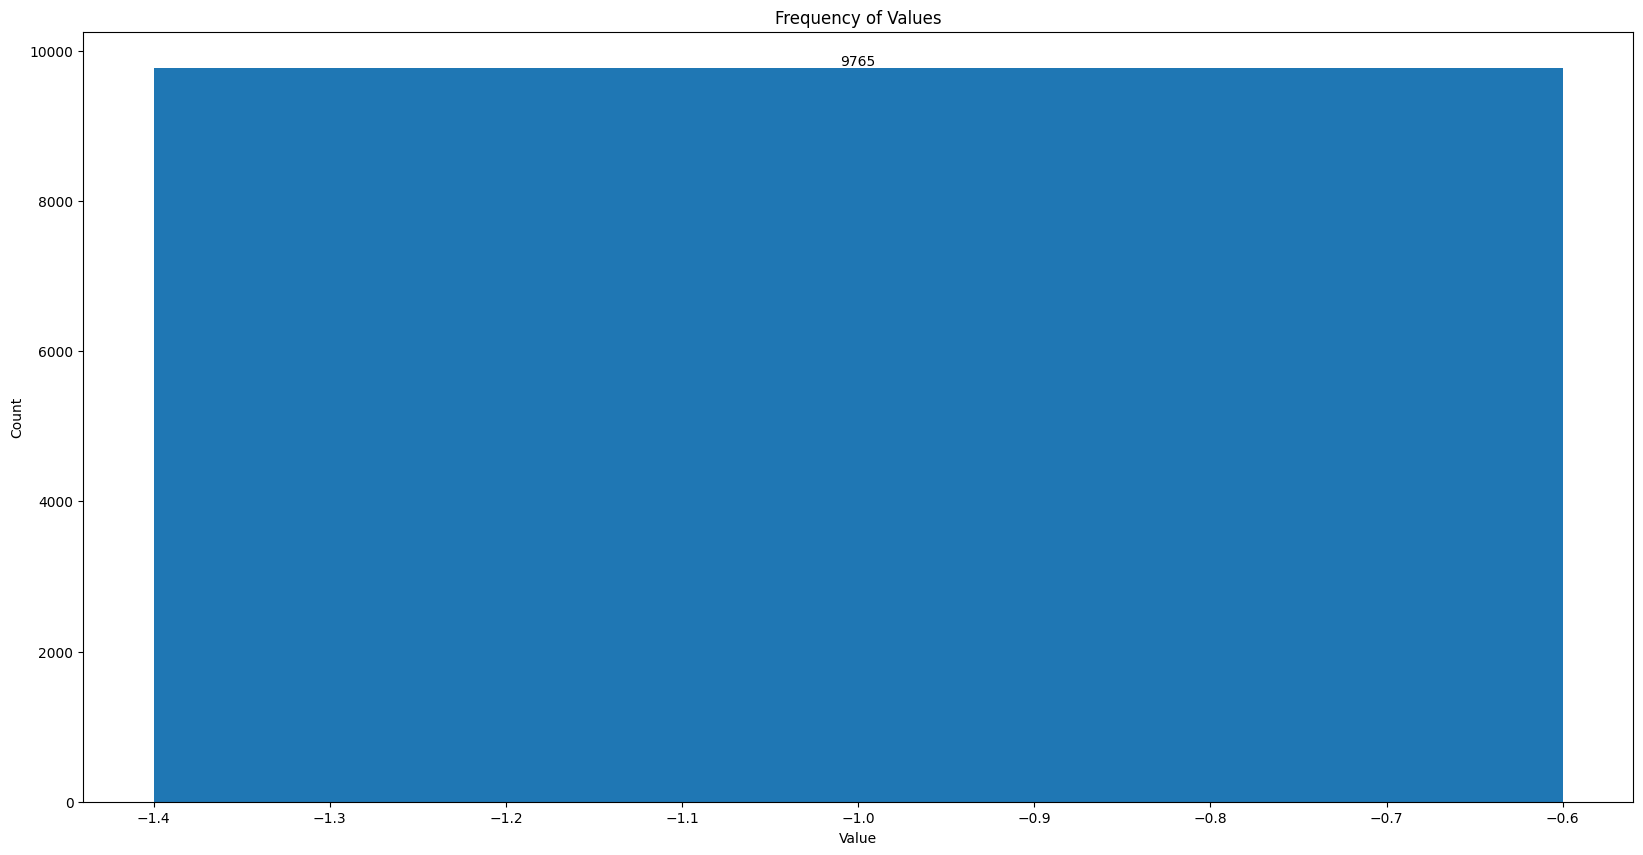

Max frequency: 9765
Min frequency: 9765
Mean frequency: 9765.0


In [50]:
import matplotlib.pyplot as plt

unique_values, counts = np.unique(outlier_cluster.labels_, return_counts=True)
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(unique_values, counts)

ax.set_xlabel('Value')
ax.set_ylabel('Count')
ax.set_title('Frequency of Values')

for i in range(len(unique_values)):
    ax.text(unique_values[i], counts[i], str(counts[i]), ha='center', va='bottom')

plt.show()
# Calculate statistics
max_value = np.max(counts)
min_value = np.min(counts)
mean_value = np.mean(counts)

print("Max frequency:", max_value)
print("Min frequency:", min_value)
print("Mean frequency:", mean_value)

KMeans

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(10, 1001, 50):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(filtered_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(10, 1001, 50), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [51]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
k = 300
km = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
km.fit_predict(filtered_data)

score = silhouette_score(filtered_data, km.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.218


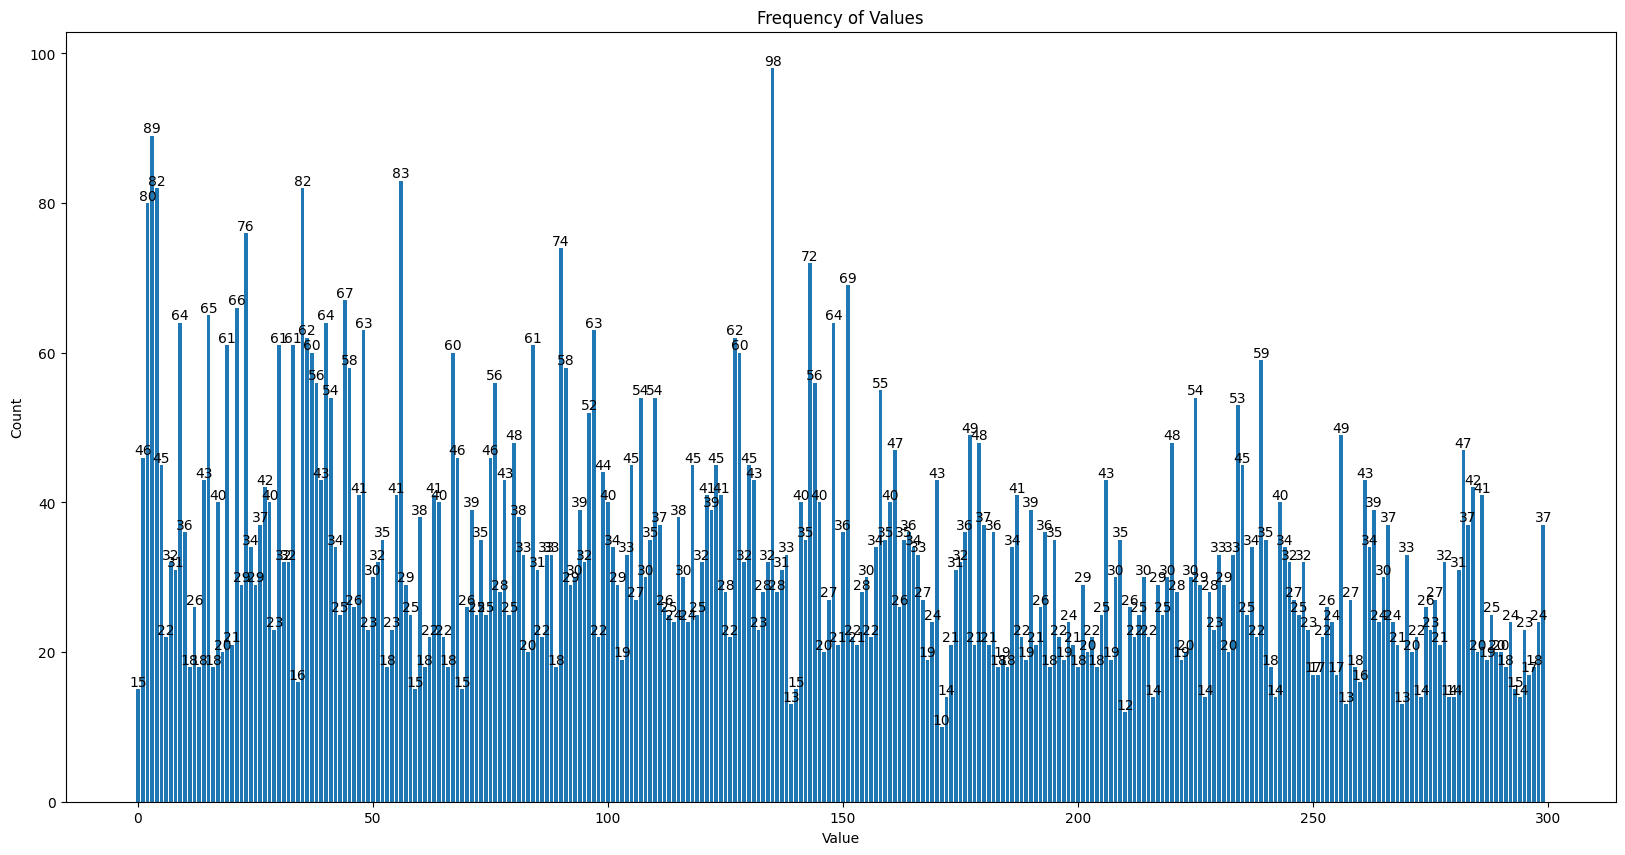

Max frequency: 98
Min frequency: 10
Mean frequency: 33.333333333333336


In [52]:
import matplotlib.pyplot as plt
import numpy as np

unique_values, counts = np.unique(km.labels_, return_counts=True)
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(unique_values, counts)

ax.set_xlabel('Value')
ax.set_ylabel('Count')
ax.set_title('Frequency of Values')

for i in range(len(unique_values)):
    ax.text(unique_values[i], counts[i], str(counts[i]), ha='center', va='bottom')

plt.show()
# Calculate statistics
max_value = np.max(counts)
min_value = np.min(counts)
mean_value = np.mean(counts)

print("Max frequency:", max_value)
print("Min frequency:", min_value)
print("Mean frequency:", mean_value)

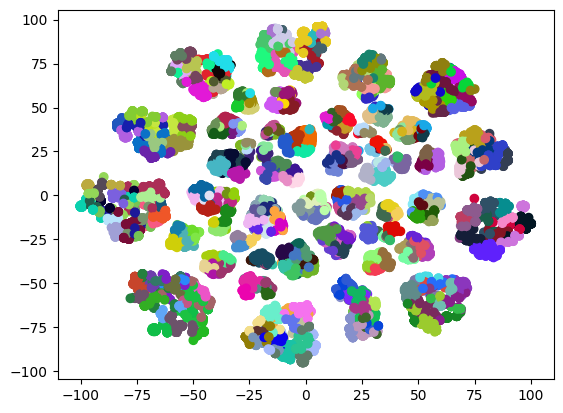

In [ ]:
colors = ['#' + ''.join(np.random.choice(list('0123456789ABCDEF'), size=6)) for _ in range(k)]
labels = km.labels_.astype(int)
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=[colors[label] for label in labels])
plt.show()

Mini Batch KMeans

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
wcss = []
for i in range(10, 1001, 50):
    kmeans = MiniBatchKMeans(n_clusters=i, batch_size=1000, max_iter=100, random_state=0, n_init="auto")
    kmeans.fit(filtered_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(10, 1001, 50), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [53]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

batch_size = 1000
max_iter = 100
k = 300
kmeans = MiniBatchKMeans(n_clusters=k, batch_size=batch_size, max_iter=max_iter, random_state=0, n_init="auto")
kmeans.fit(filtered_data)

score = silhouette_score(filtered_data, kmeans.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.215


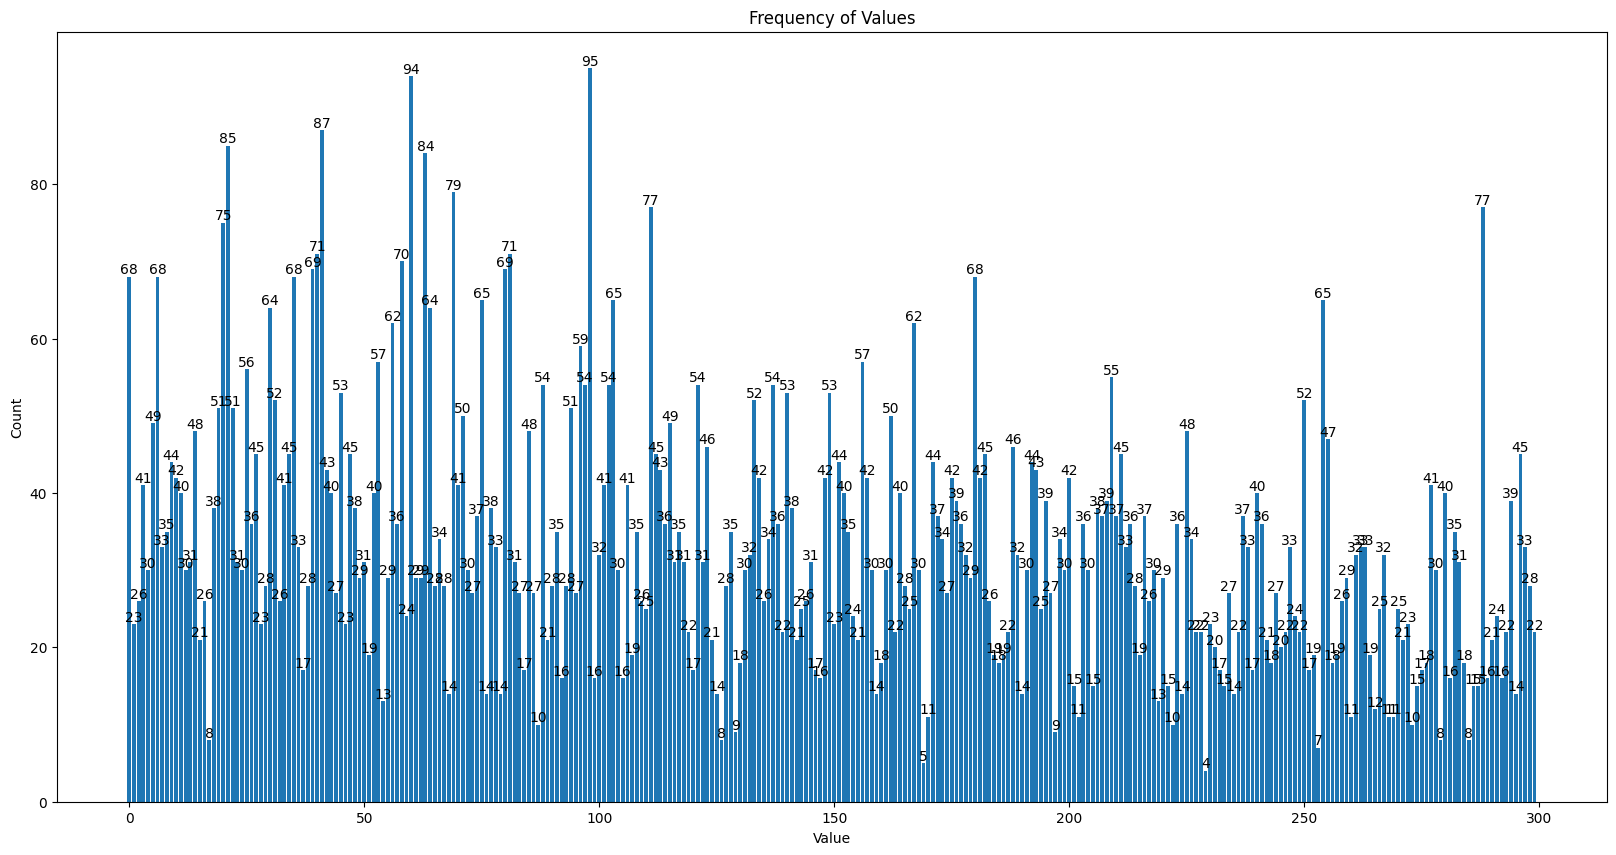

Max frequency: 95
Min frequency: 4
Mean frequency: 33.333333333333336


In [54]:
import matplotlib.pyplot as plt
import numpy as np

unique_values, counts = np.unique(kmeans.labels_, return_counts=True)
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(unique_values, counts)

ax.set_xlabel('Value')
ax.set_ylabel('Count')
ax.set_title('Frequency of Values')

for i in range(len(unique_values)):
    ax.text(unique_values[i], counts[i], str(counts[i]), ha='center', va='bottom')

plt.show()
# Calculate statistics
max_value = np.max(counts)
min_value = np.min(counts)
mean_value = np.mean(counts)

print("Max frequency:", max_value)
print("Min frequency:", min_value)
print("Mean frequency:", mean_value)

GMM

In [55]:
from sklearn.mixture import GaussianMixture
k = 300
gmm = GaussianMixture(n_components=k, covariance_type='full').fit(filtered_data)
prediction_gmm = gmm.predict(filtered_data)

score = silhouette_score(filtered_data, prediction_gmm, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.211


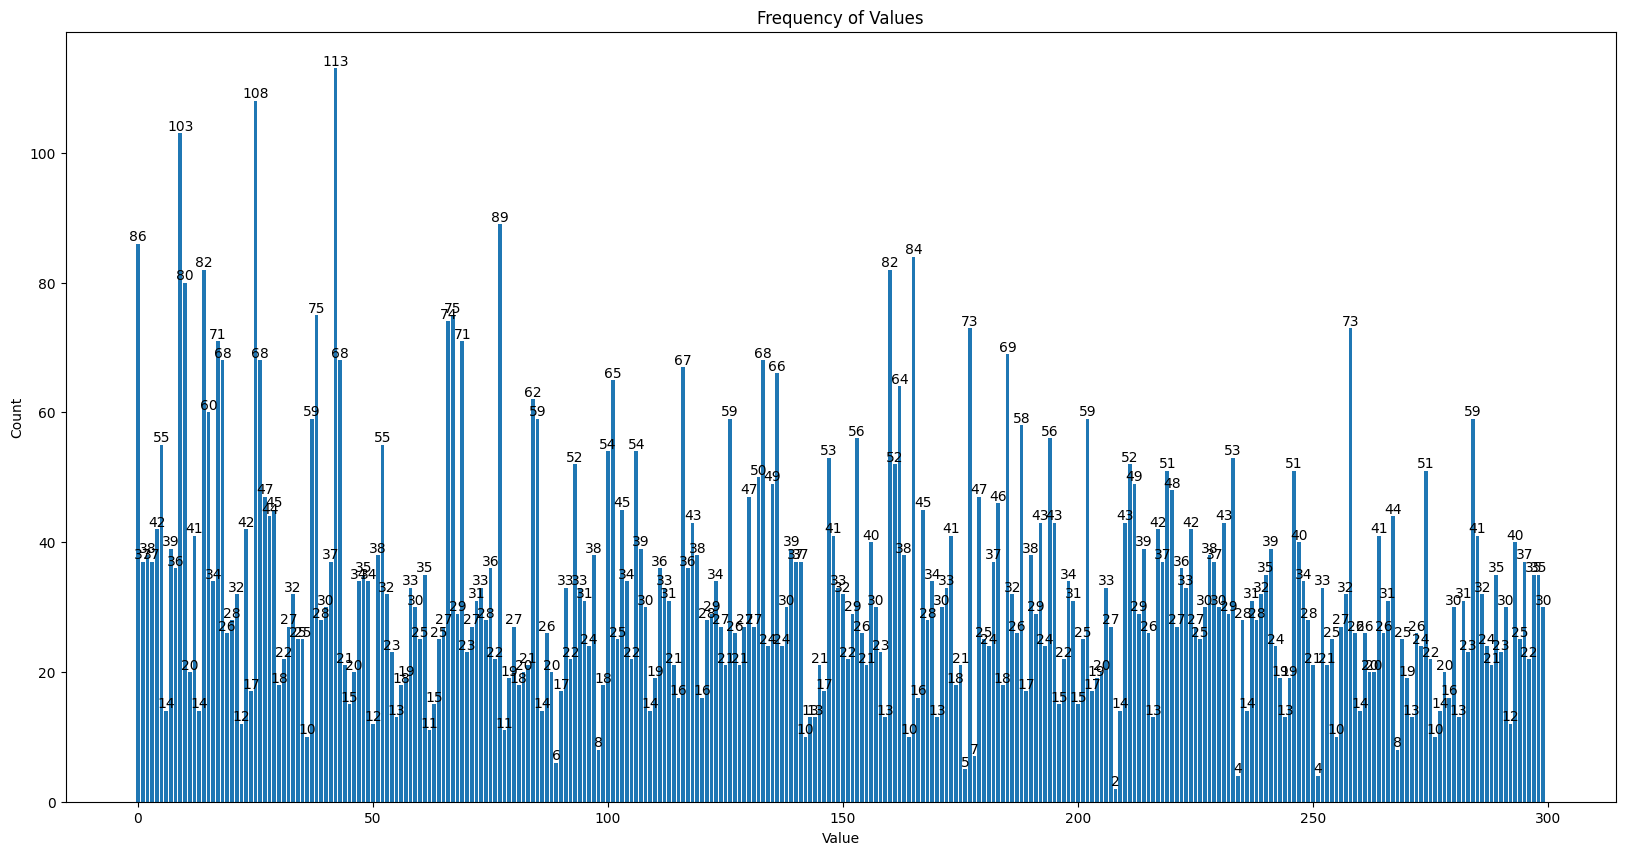

Max frequency: 113
Min frequency: 2
Mean frequency: 33.333333333333336


In [56]:
import matplotlib.pyplot as plt
import numpy as np

unique_values, counts = np.unique(prediction_gmm, return_counts=True)
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(unique_values, counts)

ax.set_xlabel('Value')
ax.set_ylabel('Count')
ax.set_title('Frequency of Values')

for i in range(len(unique_values)):
    ax.text(unique_values[i], counts[i], str(counts[i]), ha='center', va='bottom')

plt.show()
# Calculate statistics
max_value = np.max(counts)
min_value = np.min(counts)
mean_value = np.mean(counts)

print("Max frequency:", max_value)
print("Min frequency:", min_value)
print("Mean frequency:", mean_value)

Hierarchy

In [57]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=300, affinity='euclidean', linkage='ward')
labels = cluster.fit_predict(filtered_data).astype("int")

score = silhouette_score(filtered_data, labels, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Silhouetter Score: 0.213


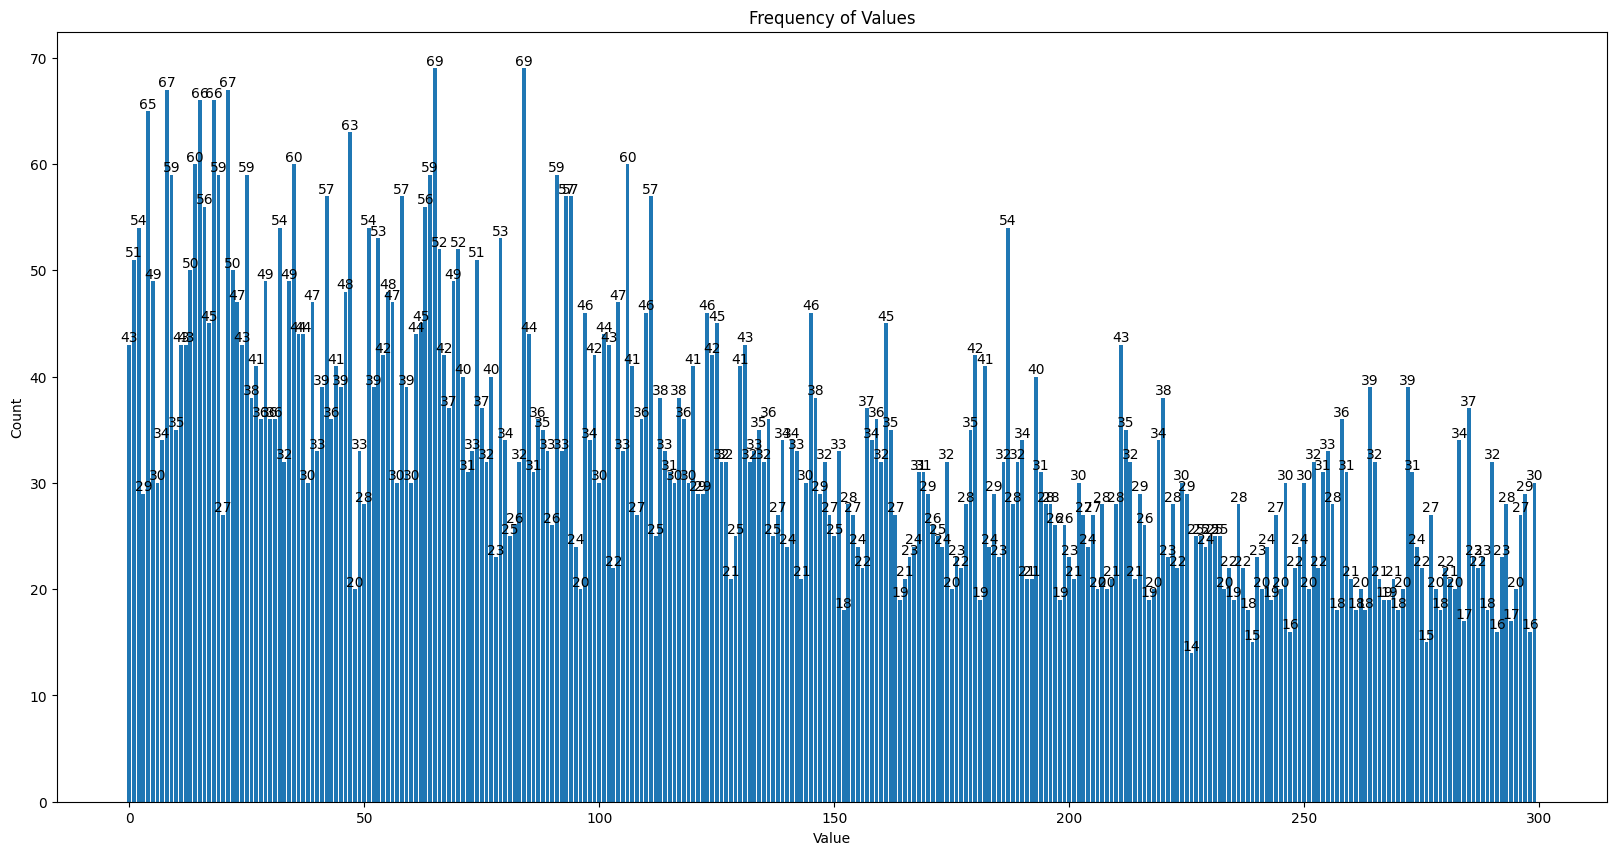

Max frequency: 69
Min frequency: 14
Mean frequency: 33.333333333333336


In [58]:
import matplotlib.pyplot as plt
import numpy as np

unique_values, counts = np.unique(labels, return_counts=True)
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(unique_values, counts)

ax.set_xlabel('Value')
ax.set_ylabel('Count')
ax.set_title('Frequency of Values')

for i in range(len(unique_values)):
    ax.text(unique_values[i], counts[i], str(counts[i]), ha='center', va='bottom')

plt.show()
# Calculate statistics
max_value = np.max(counts)
min_value = np.min(counts)
mean_value = np.mean(counts)

print("Max frequency:", max_value)
print("Min frequency:", min_value)
print("Mean frequency:", mean_value)

0&1 and randomly labels

In [ ]:
from sklearn.metrics import silhouette_score
import numpy as np

labels = np.random.randint(1, 301, size=10000)
data['Label'] = labels

features = data.iloc[:, :-1]
labels = data['Label']

silhouette = silhouette_score(features, data['Label'])
print("Silhouette score:", silhouette)

LHS and KMeans

In [ ]:
#from scipy.stats.qmc import LatinHypercube

#lhs = LatinHypercube(d=67)
#lhs_samples = lhs.random(n=10000)

#simulated_data = pd.DataFrame(lhs_samples, columns=features.columns)
#simulated_data.head()

In [ ]:
#from sklearn.cluster import KMeans
#import matplotlib.pyplot as plt

#wcss = []
#for i in range(10, 1001, 50):
    #kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    #kmeans.fit(simulated_data)
    #wcss.append(kmeans.inertia_)
#plt.plot(range(10, 1001, 50), wcss)
#plt.title('Elbow Method')
#plt.xlabel('Number of clusters')
#plt.ylabel('WCSS')
#plt.show()

In [ ]:
#from sklearn.metrics import silhouette_score
#from sklearn.cluster import KMeans

#km = KMeans(n_clusters=200, init='k-means++', max_iter=300, n_init=10, random_state=0)
#km.fit_predict(simulated_data)

#score = silhouette_score(simulated_data, km.labels_, metric='euclidean')
#print('Silhouetter Score: %.3f' % score)

In [ ]:
#import matplotlib.pyplot as plt
#import numpy as np

#unique_values, counts = np.unique(km.labels_, return_counts=True)
#fig, ax = plt.subplots(figsize=(20, 10))
#ax.bar(unique_values, counts)

#ax.set_xlabel('Value')
#ax.set_ylabel('Count')
#ax.set_title('Frequency of Values')

#for i in range(len(unique_values)):
    #ax.text(unique_values[i], counts[i], str(counts[i]), ha='center', va='bottom')

#plt.show()

Adding new sources to attend the features

In [ ]:
#import pandas as pd
#data2 = pd.read_csv('mockdataextra.csv')
#data2.head()

Gender  Age Ethnicity         Marital Status                Interests  \
0  Female   77     White  Married or Cohabiting  attending social events   
1    Male   91     White  Married or Cohabiting  attending social events   
2  Female   71     White                Widowed             taking walks   
3    Male   81     White  Married or Cohabiting                  Reading   
4  Female   73     White  Married or Cohabiting                  Reading   

                                 Health Issues Residence Type  \
0  Periodontal Disease, Ischemic Heart Disease          Urban   
1                   Hypertension, Hypertension          Urban   
2       Ischemic Heart Disease, Osteoarthritis          Urban   
3                         Osteoporosis, Cancer          Urban   
4       Mood & Anxiety Disorders, Hypertension          Urban   

   Housing Condition Living Alone                           Sleep Quality  \
0  Private Residence           No                                    Good   
1  Private Residence           No                                    Good   
2  Private Residence           No  Occasionally Difficulty Falling Asleep   
3  Private Residence          Yes                      Daytime Sleepiness   
4  Private Residence           No  Occasionally Difficulty Falling Asleep   

        Sleep Hours     Social Condition Disability Status  \
0  Meet Sleep Rules               Normal                No   
1  Meet Sleep Rules  Occasionally Lonely               Yes   
2  Meet Sleep Rules               Lonely                No   
3  Meet Sleep Rules               Normal               Yes   
4  Meet Sleep Rules               Normal                No   

        Poverty Status Householders Relationship  \
0      300% of poverty           Other relatives   
1  Below poverty level              Nonrelatives   
2      150% of poverty             Houeseholders   
3      200% of poverty              Nonrelatives   
4      200% of poverty             Houeseholders   

                            Education  
0                High school graduate  
1         Bachelor's degree or higher  
2       Less than high school diploma  
3  Some college or associate's degree  
4         Bachelor's degree or higher

In [ ]:
# spilt Health Issues column
#split_issues = data2["Health Issues"].str.split(",", n=1, expand=True)

# adding new columns
#data2["issue1"] = split_issues[0]
#data2["issue2"] = split_issues[1]

# delect
#data2.drop("Health Issues", axis=1, inplace=True)
# replace Nah
#data2.fillna(0, inplace=True)
#data2.head()

Gender  Age Ethnicity         Marital Status                Interests  \
0  Female   77     White  Married or Cohabiting  attending social events   
1    Male   91     White  Married or Cohabiting  attending social events   
2  Female   71     White                Widowed             taking walks   
3    Male   81     White  Married or Cohabiting                  Reading   
4  Female   73     White  Married or Cohabiting                  Reading   

  Residence Type  Housing Condition Living Alone  \
0          Urban  Private Residence           No   
1          Urban  Private Residence           No   
2          Urban  Private Residence           No   
3          Urban  Private Residence          Yes   
4          Urban  Private Residence           No   

                            Sleep Quality       Sleep Hours  \
0                                    Good  Meet Sleep Rules   
1                                    Good  Meet Sleep Rules   
2  Occasionally Difficulty Falling Asleep  Meet Sleep Rules   
3                      Daytime Sleepiness  Meet Sleep Rules   
4  Occasionally Difficulty Falling Asleep  Meet Sleep Rules   

      Social Condition Disability Status       Poverty Status  \
0               Normal                No      300% of poverty   
1  Occasionally Lonely               Yes  Below poverty level   
2               Lonely                No      150% of poverty   
3               Normal               Yes      200% of poverty   
4               Normal                No      200% of poverty   

  Householders Relationship                           Education  \
0           Other relatives                High school graduate   
1              Nonrelatives         Bachelor's degree or higher   
2             Houeseholders       Less than high school diploma   
3              Nonrelatives  Some college or associate's degree   
4             Houeseholders         Bachelor's degree or higher   

                     issue1                   issue2  
0       Periodontal Disease   Ischemic Heart Disease  
1              Hypertension             Hypertension  
2    Ischemic Heart Disease           Osteoarthritis  
3              Osteoporosis                   Cancer  
4  Mood & Anxiety Disorders             Hypertension

In [ ]:
# unselect columns need other actions
#columns_to_expand = data2.columns.difference(["Age","Interests"])

# feature expension
#expanded_data = pd.get_dummies(data2[columns_to_expand], dummy_na=False)

# replace Nah
#expanded_data.fillna(0, inplace=True)

# merge with original dataset
#data_expanded = pd.concat([data2[["Age", "Interests"]], expanded_data], axis=1)
#data_expanded.head()

Age                Interests  Disability Status_No  Disability Status_Yes  \
0   77  attending social events                     1                      0   
1   91  attending social events                     0                      1   
2   71             taking walks                     1                      0   
3   81                  Reading                     0                      1   
4   73                  Reading                     1                      0   

   Education_Bachelor's degree or higher  Education_High school graduate  \
0                                      0                               1   
1                                      1                               0   
2                                      0                               0   
3                                      0                               0   
4                                      1                               0   

   Education_Less than high school diploma  \
0                                        0   
1                                        0   
2                                        1   
3                                        0   
4                                        0   

   Education_Some college or associate's degree  Ethnicity_Black  \
0                                             0                0   
1                                             0                0   
2                                             0                0   
3                                             1                0   
4                                             0                0   

   Ethnicity_East Asian or Southeast Asian  ...  issue2_ Asthma  issue2_ COPD  \
0                                        0  ...               0             0   
1                                        0  ...               0             0   
2                                        0  ...               0             0   
3                                        0  ...               0             0   
4                                        0  ...               0             0   

   issue2_ Cancer  issue2_ Diabetes  issue2_ Hypertension  \
0               0                 0                     0   
1               0                 0                     1   
2               0                 0                     0   
3               1                 0                     0   
4               0                 0                     1   

   issue2_ Ischemic Heart Disease  issue2_ Mood & Anxiety Disorders  \
0                               1                                 0   
1                               0                                 0   
2                               0                                 0   
3                               0                                 0   
4                               0                                 0   

   issue2_ Osteoarthritis  issue2_ Osteoporosis  issue2_ Periodontal Disease  
0                       0                     0                            0  
1                       0                     0                            0  
2                       1                     0                            0  
3                       0                     0                            0  
4                       0                     0                            0  

[5 rows x 67 columns]

In [ ]:
# set age labels
#ranges = [(65, 68), (69, 72), (73, 76), (77, 80), (81, 85), (86, 90), (91, 95), (96, 100)]
#labels = [f"Age_{i+1}" for i in range(len(ranges))]

#expanded_data = pd.DataFrame()

# feature expension
#for i, (start, end) in enumerate(ranges):
    #expanded_data[labels[i]] = data_expanded["Age"].apply(lambda x: 1 if start <= x <= end else 0)

# merge with old data
#expanded_data = pd.concat([expanded_data, data_expanded.iloc[:, 1:]], axis=1)
#expanded_data.head()

Age_1  Age_2  Age_3  Age_4  Age_5  Age_6  Age_7  Age_8  \
0      0      0      0      1      0      0      0      0   
1      0      0      0      0      0      0      1      0   
2      0      1      0      0      0      0      0      0   
3      0      0      0      0      1      0      0      0   
4      0      0      1      0      0      0      0      0   

                 Interests  Disability Status_No  ...  issue2_ Asthma  \
0  attending social events                     1  ...               0   
1  attending social events                     0  ...               0   
2             taking walks                     1  ...               0   
3                  Reading                     0  ...               0   
4                  Reading                     1  ...               0   

   issue2_ COPD  issue2_ Cancer  issue2_ Diabetes  issue2_ Hypertension  \
0             0               0                 0                     0   
1             0               0                 0                     1   
2             0               0                 0                     0   
3             0               1                 0                     0   
4             0               0                 0                     1   

   issue2_ Ischemic Heart Disease  issue2_ Mood & Anxiety Disorders  \
0                               1                                 0   
1                               0                                 0   
2                               0                                 0   
3                               0                                 0   
4                               0                                 0   

   issue2_ Osteoarthritis  issue2_ Osteoporosis  issue2_ Periodontal Disease  
0                       0                     0                            0  
1                       0                     0                            0  
2                       1                     0                            0  
3                       0                     0                            0  
4                       0                     0                            0  

[5 rows x 74 columns]

In [ ]:
#rename columns
#new_column_names = {
    #'Age_1': '65-68',
    #'Age_2': '69-72',
    #'Age_3': '73-76',
    #'Age_4': '77-80',
    #'Age_5': '81-85',
    #'Age_6': '86-90',
    #'Age_7': '91-95',
    #'Age_8': '96-100',}
#expanded_data.rename(columns=new_column_names, inplace=True)
#expanded_data.head()

65-68  69-72  73-76  77-80  81-85  86-90  91-95  96-100  \
0      0      0      0      1      0      0      0       0   
1      0      0      0      0      0      0      1       0   
2      0      1      0      0      0      0      0       0   
3      0      0      0      0      1      0      0       0   
4      0      0      1      0      0      0      0       0   

                 Interests  Disability Status_No  ...  issue2_ Asthma  \
0  attending social events                     1  ...               0   
1  attending social events                     0  ...               0   
2             taking walks                     1  ...               0   
3                  Reading                     0  ...               0   
4                  Reading                     1  ...               0   

   issue2_ COPD  issue2_ Cancer  issue2_ Diabetes  issue2_ Hypertension  \
0             0               0                 0                     0   
1             0               0                 0                     1   
2             0               0                 0                     0   
3             0               1                 0                     0   
4             0               0                 0                     1   

   issue2_ Ischemic Heart Disease  issue2_ Mood & Anxiety Disorders  \
0                               1                                 0   
1                               0                                 0   
2                               0                                 0   
3                               0                                 0   
4                               0                                 0   

   issue2_ Osteoarthritis  issue2_ Osteoporosis  issue2_ Periodontal Disease  
0                       0                     0                            0  
1                       0                     0                            0  
2                       1                     0                            0  
3                       0                     0                            0  
4                       0                     0                            0  

[5 rows x 74 columns]

In [ ]:
# copy other columns to a new dataframe
#data_expanded_new = expanded_data.drop('Interests', axis=1).copy()

# change other interests to 'others' according to the list
#interests_to_keep = ['attending social events', 'volunteering', 'taking walks', 'doing crossword puzzles', 'Reading', 'listening to music', 'Fitness and Exercise']
#data_expanded['Interests'] = data_expanded['Interests'].apply(lambda x: x if x in interests_to_keep else 'others')

# feature expension
#expanded_interests = pd.get_dummies(data_expanded['Interests'], prefix='Interest')

# merge with old data
#data_expanded_new = pd.concat([data_expanded_new, expanded_interests], axis=1)
#data_expanded_new.head()

65-68  69-72  73-76  77-80  81-85  86-90  91-95  96-100  \
0      0      0      0      1      0      0      0       0   
1      0      0      0      0      0      0      1       0   
2      0      1      0      0      0      0      0       0   
3      0      0      0      0      1      0      0       0   
4      0      0      1      0      0      0      0       0   

   Disability Status_No  Disability Status_Yes  ...  issue2_ Osteoporosis  \
0                     1                      0  ...                     0   
1                     0                      1  ...                     0   
2                     1                      0  ...                     0   
3                     0                      1  ...                     0   
4                     1                      0  ...                     0   

   issue2_ Periodontal Disease  Interest_Fitness and Exercise  \
0                            0                              0   
1                            0                              0   
2                            0                              0   
3                            0                              0   
4                            0                              0   

   Interest_Reading  Interest_attending social events  \
0                 0                                 1   
1                 0                                 1   
2                 0                                 0   
3                 1                                 0   
4                 1                                 0   

   Interest_doing crossword puzzles  Interest_listening to music  \
0                                 0                            0   
1                                 0                            0   
2                                 0                            0   
3                                 0                            0   
4                                 0                            0   

   Interest_others  Interest_taking walks  Interest_volunteering  
0                0                      0                      0  
1                0                      0                      0  
2                0                      1                      0  
3                0                      0                      0  
4                0                      0                      0  

[5 rows x 81 columns]

In [ ]:
#output_filename = '0&1dataset2.csv'
#data_expanded_new.to_csv(output_filename, index=False)

In [ ]:
#import pandas as pd
#data2 = pd.read_csv('0&1dataset2.csv')
#data2.head()

65-68  69-72  73-76  77-80  81-85  86-90  91-95  96-100  \
0      0      0      0      1      0      0      0       0   
1      0      0      0      0      0      0      1       0   
2      0      1      0      0      0      0      0       0   
3      0      0      0      0      1      0      0       0   
4      0      0      1      0      0      0      0       0   

   Disability Status_No  Disability Status_Yes  ...  issue2_ Osteoporosis  \
0                     1                      0  ...                     0   
1                     0                      1  ...                     0   
2                     1                      0  ...                     0   
3                     0                      1  ...                     0   
4                     1                      0  ...                     0   

   issue2_ Periodontal Disease  Interest_Fitness and Exercise  \
0                            0                              0   
1                            0                              0   
2                            0                              0   
3                            0                              0   
4                            0                              0   

   Interest_Reading  Interest_attending social events  \
0                 0                                 1   
1                 0                                 1   
2                 0                                 0   
3                 1                                 0   
4                 1                                 0   

   Interest_doing crossword puzzles  Interest_listening to music  \
0                                 0                            0   
1                                 0                            0   
2                                 0                            0   
3                                 0                            0   
4                                 0                            0   

   Interest_others  Interest_taking walks  Interest_volunteering  
0                0                      0                      0  
1                0                      0                      0  
2                0                      1                      0  
3                0                      0                      0  
4                0                      0                      0  

[5 rows x 81 columns]

TSNE

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.005s...
[t-SNE] Computed neighbors for 10000 samples in 1.769s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.971150
[t-SNE] KL divergence after 50 iterations with early exaggeration: 97.006821
[t-SNE] KL divergence after 1000 iterations: 3.691977


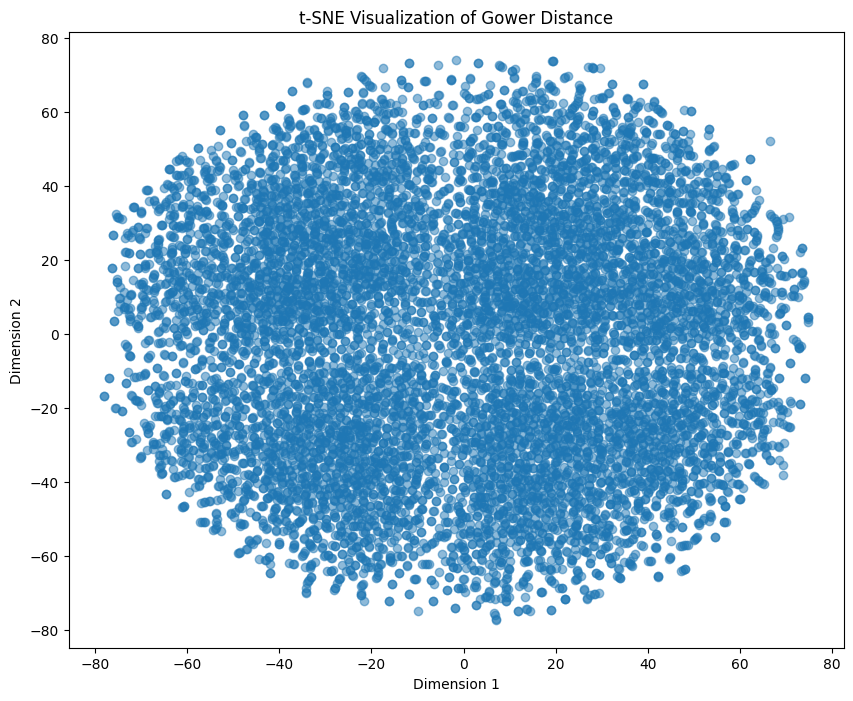

In [ ]:
#tsne = TSNE(n_components=2, verbose=1, random_state=42)
#data_tsne = tsne.fit_transform(data2)

# scatter plot
#plt.figure(figsize=(10, 8))
#plt.scatter(data_tsne[:, 0], data_tsne[:, 1], alpha=0.5) #first and second column
#plt.title('t-SNE Visualization of Gower Distance')
#plt.xlabel('Dimension 1')
#plt.ylabel('Dimension 2')
#plt.show()

In [ ]:
#import pandas as pd
#import numpy as np

#variances = data2.var()
#mean_variance = variances.mean()
#std_deviation = np.std(variances)

#print("Columns Variance:")
#print(variances)
#print("Mean Variance:")
#print(mean_variance)
#print("Standard Deviation:")
#print(std_deviation)

Columns Variance:
65-68                               0.179793
69-72                               0.176631
73-76                               0.141180
77-80                               0.103091
81-85                               0.113259
                                      ...   
Interest_doing crossword puzzles    0.109386
Interest_listening to music         0.083708
Interest_others                     0.140850
Interest_taking walks               0.116933
Interest_volunteering               0.129881
Length: 81, dtype: float64
Mean Variance:
0.12225013167983467
Standard Deviation:
0.07341001883441163


Select columns with top 30% variance

In [ ]:
#threshold = threshold = np.percentile(variances, 70)
#filtered_columns = variances[variances >= threshold].index
#filtered_data = data2[filtered_columns]
#filtered_data.head()

65-68  69-72  Disability Status_No  Disability Status_Yes  \
0      0      0                     1                      0   
1      0      0                     0                      1   
2      0      1                     1                      0   
3      0      0                     0                      1   
4      0      0                     1                      0   

   Education_Bachelor's degree or higher  Education_High school graduate  \
0                                      0                               1   
1                                      1                               0   
2                                      0                               0   
3                                      0                               0   
4                                      1                               0   

   Gender_Female  Gender_Male  Householders Relationship_Houeseholders  \
0              1            0                                        0   
1              0            1                                        0   
2              1            0                                        1   
3              0            1                                        0   
4              1            0                                        1   

   Householders Relationship_Nonrelatives  ...  Residence Type_Urban  \
0                                       0  ...                     1   
1                                       1  ...                     1   
2                                       0  ...                     1   
3                                       1  ...                     1   
4                                       0  ...                     1   

   Sleep Hours_Less Than Sleep Rules  Sleep Hours_Meet Sleep Rules  \
0                                  0                             1   
1                                  0                             1   
2                                  0                             1   
3                                  0                             1   
4                                  0                             1   

   Sleep Quality_Daytime Sleepiness  Sleep Quality_Good  \
0                                 0                   1   
1                                 0                   1   
2                                 0                   0   
3                                 1                   0   
4                                 0                   0   

   Sleep Quality_Occasionally Difficulty Falling Asleep  \
0                                                  0      
1                                                  0      
2                                                  1      
3                                                  0      
4                                                  1      

   Social Condition_Normal  Social Condition_Occasionally Lonely  \
0                        1                                     0   
1                        0                                     1   
2                        0                                     0   
3                        1                                     0   
4                        1                                     0   

   issue1_Hypertension  issue2_ Hypertension  
0                    0                     0  
1                    1                     1  
2                    0                     0  
3                    0                     0  
4                    0                     1  

[5 rows x 25 columns]

In [ ]:
#filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   65-68                                                 10000 non-null  int64
 1   69-72                                                 10000 non-null  int64
 2   Disability Status_No                                  10000 non-null  int64
 3   Disability Status_Yes                                 10000 non-null  int64
 4   Education_Bachelor's degree or higher                 10000 non-null  int64
 5   Education_High school graduate                        10000 non-null  int64
 6   Gender_Female                                         10000 non-null  int64
 7   Gender_Male                                           10000 non-null  int64
 8   Householders Relationship_Houeseholders               10000 non-null  int64
 

TSNE

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.001s...
[t-SNE] Computed neighbors for 10000 samples in 0.511s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.787643
[t-SNE] KL divergence after 250 iterations with early exaggeration: 94.149048
[t-SNE] KL divergence after 1000 iterations: 1.883509


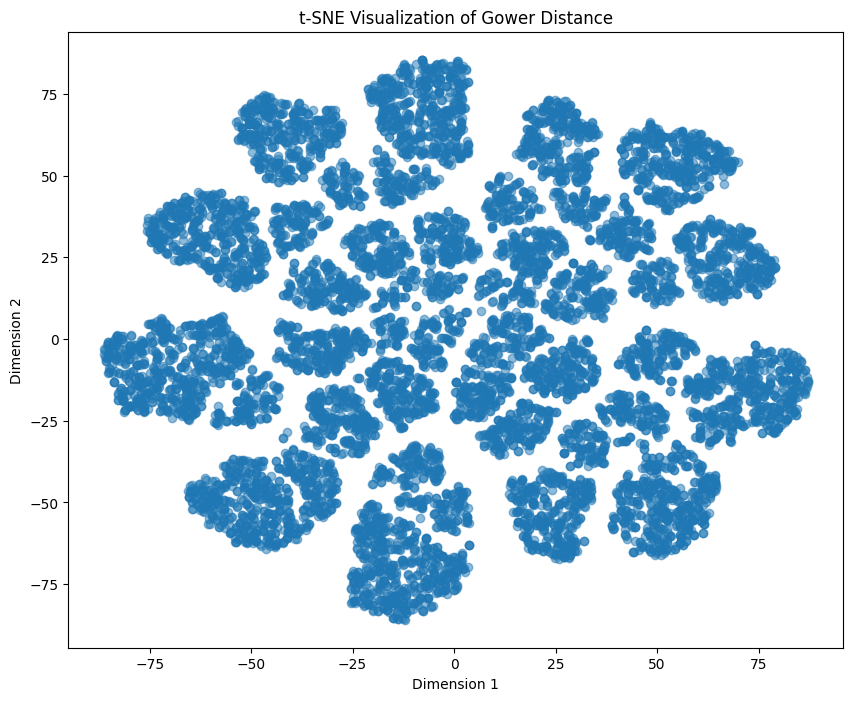

In [ ]:
#from sklearn.manifold import TSNE

# dimension reduction
#tsne = TSNE(n_components=2, verbose=1, random_state=42)
#data_tsne = tsne.fit_transform(filtered_data)

# scatter plot
#plt.figure(figsize=(10, 8))
#plt.scatter(data_tsne[:, 0], data_tsne[:, 1], alpha=0.5) #first and second column
#plt.title('t-SNE Visualization of Gower Distance')
#plt.xlabel('Dimension 1')
#plt.ylabel('Dimension 2')
#plt.show()

DBSCNE

In [ ]:
#from sklearn.cluster import DBSCAN
#from sklearn.metrics import silhouette_score

# Configuring the parameters of the clustering algorithm
#dbscan_cluster = DBSCAN(eps=0.5, min_samples=20)
#dbscan_cluster.fit(filtered_data)

#dbscan_cluster.labels_

array([-1, -1, -1, ..., -1, -1, -1])

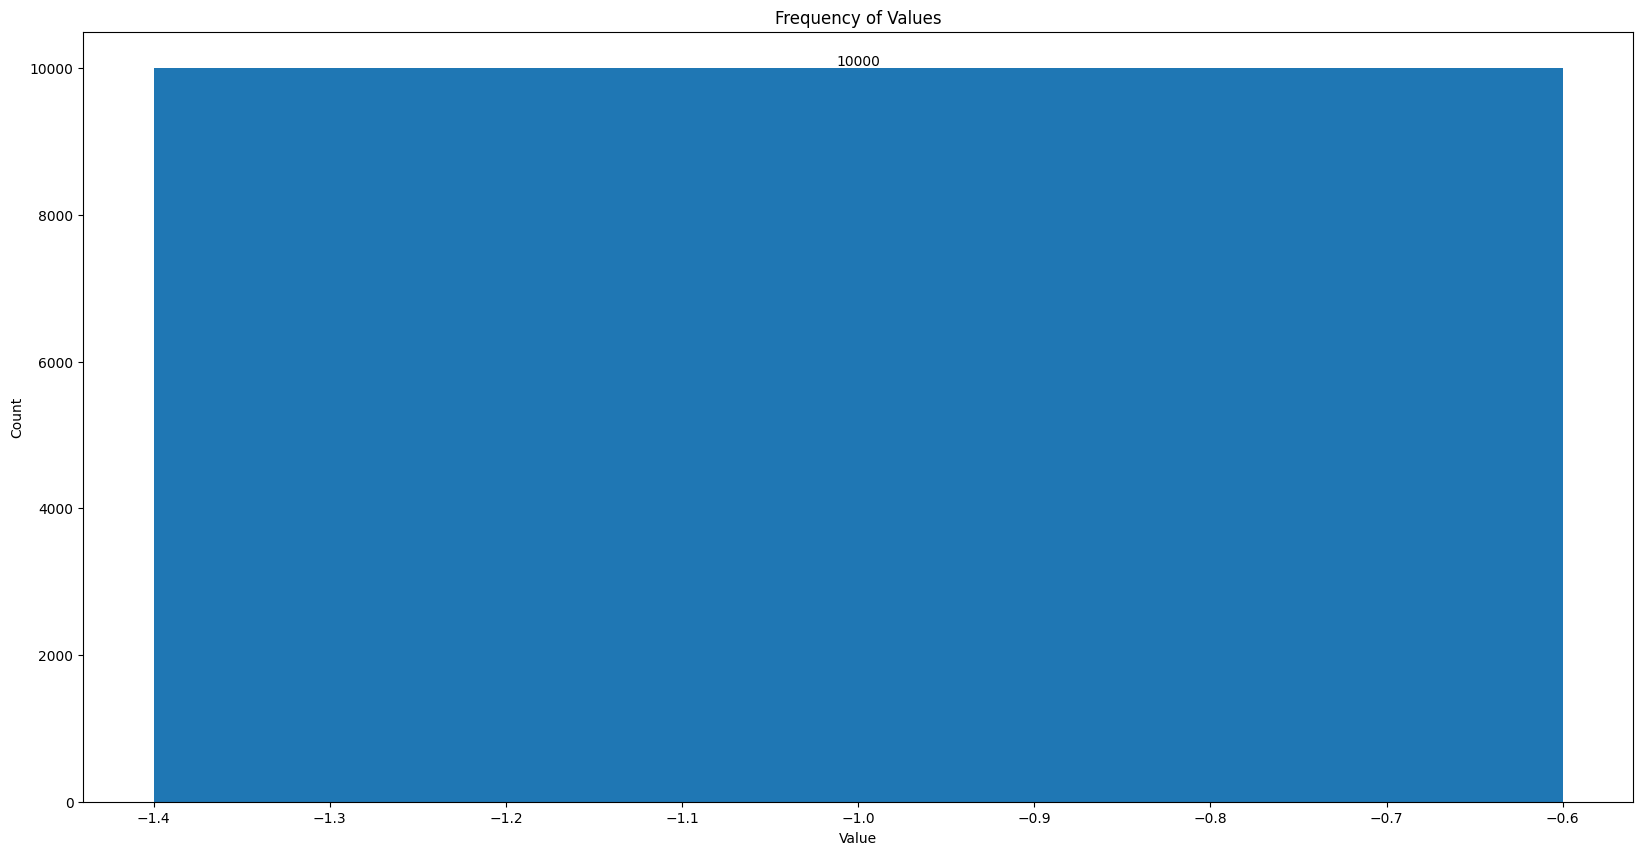

In [ ]:
#import matplotlib.pyplot as plt

#unique_values, counts = np.unique(dbscan_cluster.labels_, return_counts=True)
#fig, ax = plt.subplots(figsize=(20, 10))
#ax.bar(unique_values, counts)

#ax.set_xlabel('Value')
#ax.set_ylabel('Count')
#ax.set_title('Frequency of Values')

#for i in range(len(unique_values)):
    #ax.text(unique_values[i], counts[i], str(counts[i]), ha='center', va='bottom')

#plt.show()

KMeans

In [ ]:
#from sklearn.cluster import KMeans
#import matplotlib.pyplot as plt

#wcss = []
#for i in range(10, 1001, 50):
    #kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    #kmeans.fit(filtered_data)
    #wcss.append(kmeans.inertia_)
#plt.plot(range(10, 1001, 50), wcss)
#plt.title('Elbow Method')
#plt.xlabel('Number of clusters')
#plt.ylabel('WCSS')
#plt.show()

In [ ]:
#from sklearn.metrics import silhouette_score
#from sklearn.cluster import KMeans

#km = KMeans(n_clusters=300, init='k-means++', max_iter=300, n_init=10, random_state=0)
#km.fit_predict(filtered_data)

#score = silhouette_score(filtered_data, km.labels_, metric='euclidean')
#print('Silhouetter Score: %.3f' % score)

In [ ]:
#unique_values, counts = np.unique(km.labels_, return_counts=True)
#fig, ax = plt.subplots(figsize=(20, 10))
#ax.bar(unique_values, counts)

#ax.set_xlabel('Value')
#ax.set_ylabel('Count')
#ax.set_title('Frequency of Values')

#for i in range(len(unique_values)):
    #ax.text(unique_values[i], counts[i], str(counts[i]), ha='center', va='bottom')

#plt.show()

Mini Batch KMeans

In [ ]:
#import matplotlib.pyplot as plt
#from sklearn.cluster import MiniBatchKMeans
#wcss = []
#for i in range(10, 1001, 50):
    #kmeans = MiniBatchKMeans(n_clusters=i, batch_size=1000, max_iter=100, random_state=0, n_init="auto")
    #kmeans.fit(filtered_data)
    #wcss.append(kmeans.inertia_)
#plt.plot(range(10, 1001, 50), wcss)
#plt.title('Elbow Method')
#plt.xlabel('Number of clusters')
#plt.ylabel('WCSS')
#plt.show()

In [ ]:
#from sklearn.cluster import MiniBatchKMeans
#from sklearn.metrics import silhouette_score

#batch_size = 1000
#max_iter = 100
#k = 300
#kmeans = MiniBatchKMeans(n_clusters=k, batch_size=batch_size, max_iter=max_iter, random_state=0, n_init="auto")
#kmeans.fit(filtered_data)

#score = silhouette_score(filtered_data, kmeans.labels_, metric='euclidean')
#print('Silhouette Score: %.3f' % score)

In [ ]:
#unique_values, counts = np.unique(kmeans.labels_, return_counts=True)
#fig, ax = plt.subplots(figsize=(20, 10))
#ax.bar(unique_values, counts)

#ax.set_xlabel('Value')
#ax.set_ylabel('Count')
#ax.set_title('Frequency of Values')

#for i in range(len(unique_values)):
    #ax.text(unique_values[i], counts[i], str(counts[i]), ha='center', va='bottom')

#plt.show()

GMM

In [ ]:
#from sklearn.mixture import GaussianMixture
#k = 500
#gmm = GaussianMixture(n_components=k, covariance_type='full').fit(filtered_data)
#prediction_gmm = gmm.predict(filtered_data)

#score = silhouette_score(filtered_data, prediction_gmm, metric='euclidean')
#print('Silhouetter Score: %.3f' % score)

In [ ]:
#unique_values, counts = np.unique(prediction_gmm, return_counts=True)
#fig, ax = plt.subplots(figsize=(20, 10))
#ax.bar(unique_values, counts)

#ax.set_xlabel('Value')
#ax.set_ylabel('Count')
#ax.set_title('Frequency of Values')

#for i in range(len(unique_values)):
    #ax.text(unique_values[i], counts[i], str(counts[i]), ha='center', va='bottom')

#plt.show()

Hierarchy

In [ ]:
#from sklearn.cluster import AgglomerativeClustering
#cluster = AgglomerativeClustering(n_clusters=300, affinity='euclidean', linkage='ward')
#labels = cluster.fit_predict(filtered_data).astype("int")

#score = silhouette_score(filtered_data, labels, metric='euclidean')
#print('Silhouetter Score: %.3f' % score)